In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
if "housing" in os.path.abspath(os.path.curdir): os.chdir("..")
BASE_DIR = os.path.abspath(os.path.curdir)

In [3]:
def load_csv(dir_name, file_name):
    csv_path = os.path.join(BASE_DIR, "datasets", dir_name, file_name)
    return pd.read_csv(csv_path)

In [4]:
class Library:
    
    def __init__(self, df):
        self.df = df
        self.df_copy = df.copy()
        self.attrs = {}
        
    def update_attrs(self, dict_):
        assert isinstance(dict_, dict), "only accepts dict type objects" 
        self.attrs.update(dict_)
        print(f"attributes library updated with key:{list(dict_.keys())}")
    
    def get_attrs(self):
        return self.attrs
    
    def get_df(self):
        return self.df

In [5]:
# dataset link: https://www.kaggle.com/c/house-prices-advanced-regression-techniques
df = load_csv("housing", "advanced_housing_train_kaggle.csv")

In [6]:
lib = Library(df)

## Basic EDA

### Identifying the types of data and features

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Id feature is simply unique ID, so it is not helpful for learning. Let's remove it.

In [8]:
df.drop("Id", axis=1, inplace=True)

In [20]:
df_copy = df.copy()

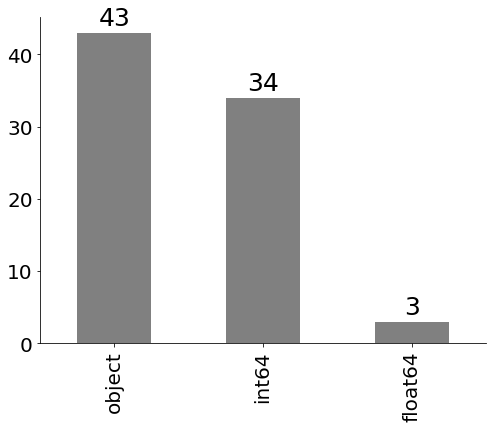

In [9]:
# Ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features
plt.figure(figsize = (8,6))
ax = df.dtypes.value_counts().plot(kind='bar', grid = False, fontsize=20, color='grey')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, height, ha = 'center', size = 25)
sns.despine()

#### Observations
    - there are 37 numerical columns.Out of which 34 are integers and 3 are float.
    - and 43 columns are categorical columns

In [10]:
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)

In [11]:
labels = ["SalePrice"]
lib.update_attrs({"labels": labels})

attributes library updated with key:['labels']


In [12]:
cat_attrs = [c_ for c_ in df.columns if df[c_].dtypes == "object" and c_ not in labels]
lib.update_attrs({"cat_attrs": cat_attrs})

attributes library updated with key:['cat_attrs']


In [13]:
num_attrs = [c_ for c_ in df.columns if c_ not in cat_attrs+labels]
lib.update_attrs({"num_attrs": num_attrs})

attributes library updated with key:['num_attrs']


In [14]:
date_time_attrs = [c for c in num_attrs if "Yr" in c or "Year" in c and c not in labels]
lib.update_attrs({"date_time_attrs": date_time_attrs})

attributes library updated with key:['date_time_attrs']


In [15]:
dis_attrs = [c_ for c_ in num_attrs if len(df[c_].value_counts())/len(df) < 0.02 and c_ not in date_time_attrs+labels]
lib.update_attrs({"dis_attrs": dis_attrs})

attributes library updated with key:['dis_attrs']


In [16]:
cont_attrs = [c for c in num_attrs if c not in dis_attrs+date_time_attrs+labels]
lib.update_attrs({"cont_attrs": cont_attrs})

attributes library updated with key:['cont_attrs']


#### Observations
 - we categories the feautres into numeric, categorical, discrete, date_time, continuos and labels
 - as discrete, date_time and continuos is sub category of numerical data.
 - we can also sub-categories the categorical features but it needs some domain-knowledge so for now it left for future work

# Check missing values

#### For Numerical features

In [17]:
df[num_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
1,LotFrontage,259
24,GarageYrBlt,81
7,MasVnrArea,8
27,WoodDeckSF,0
20,BedroomAbvGr,0
21,KitchenAbvGr,0
22,TotRmsAbvGrd,0
23,Fireplaces,0
25,GarageCars,0
26,GarageArea,0


#### Observations
    - As we can see there are some missing features but we will cover it with EDA of numerical features

#### For Categorical Features

In [18]:
df[cat_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
38,PoolQC,1453
40,MiscFeature,1406
2,Alley,1369
39,Fence,1179
32,FireplaceQu,690
33,GarageType,81
36,GarageCond,81
35,GarageQual,81
34,GarageFinish,81
25,BsmtFinType2,38


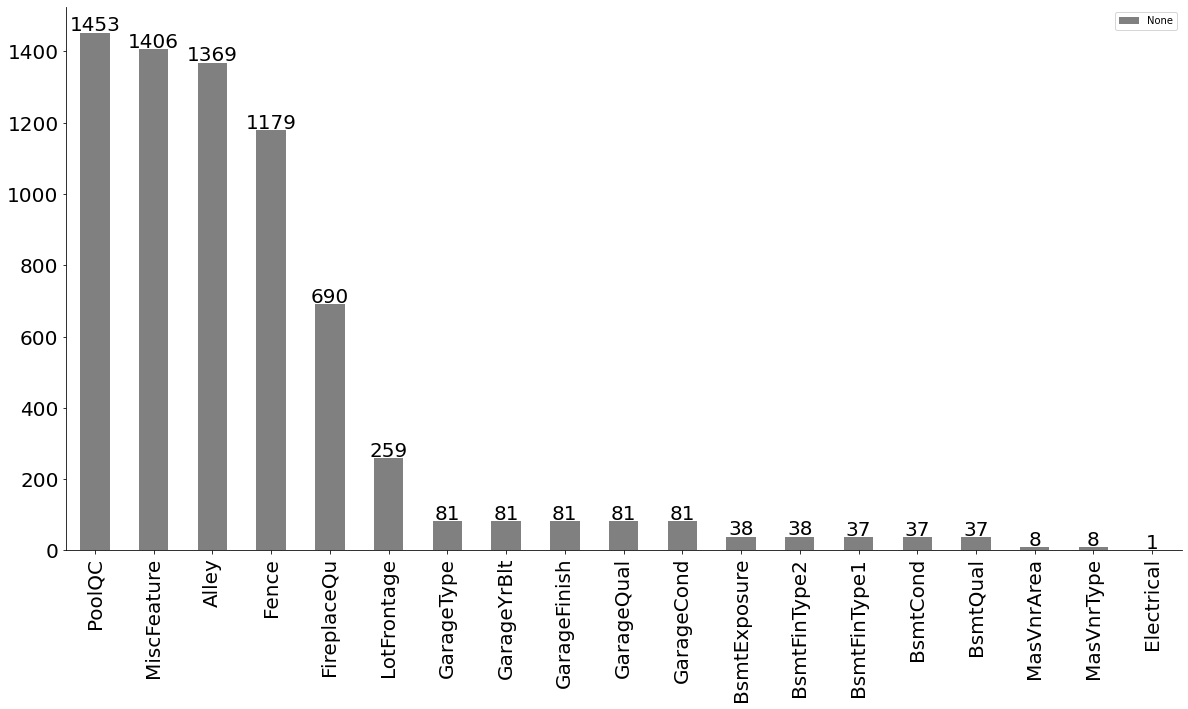

In [19]:
# ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features

isnull_series = df.loc[:,:'SaleCondition'].isnull().sum()
isnull_series[isnull_series > 0].sort_values(ascending=False)

plt.figure(figsize = (20,10))
ax = isnull_series[isnull_series > 0].sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.legend(loc = 'upper right')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 5, height, ha = 'center', size = 20)
sns.despine()

#### Observations
    - PoolQc, MiscFeature, Alley, Fence and FieplaceQu has too many missing values
    - Garage related feature has 81 missing values
    - Basement related feature has 38 missing values
    - we can replace missing values here also but it is more convinient to do with EDA on categorical datas

## Checking Target

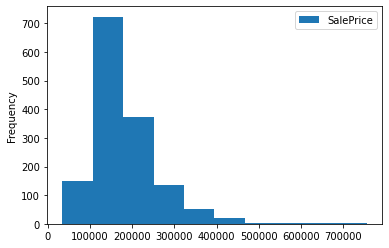

In [21]:
df[labels].plot.hist()
plt.show()

In [22]:
# just to check skewness 
# ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features
mean = df['SalePrice'].mean()
std = df['SalePrice'].std()
skew = df['SalePrice'].skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 180921.1959, std: 79442.5029, skew: 1.8829


#### Observations
    - As we can see here it is skewed plot
    - can be tranform to log scale for more optimizing the skewness

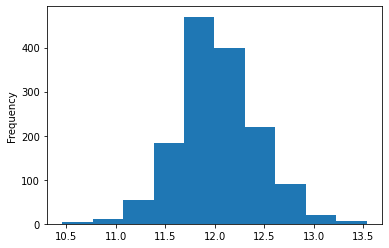

In [23]:
log_label = np.log(df['SalePrice'])
log_label.plot.hist()
plt.show()

In [24]:
# just to check skewness 
mean = log_label.mean()
std = log_label.std()
skew = log_label.skew()
print('SalePrice : mean: {0:.4f}, std: {1:.4f}, skew: {2:.4f}'.format(mean, std, skew))

SalePrice : mean: 12.0241, std: 0.3995, skew: 0.1213


####  Observations
    skewness is improved after log tranformation

## EDA for numerical features

#### NOTE: histogram is better choice for continuos/discrete feature and bar is for discrete feature

In [25]:
df[num_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
1,LotFrontage,259
24,GarageYrBlt,81
7,MasVnrArea,8
27,WoodDeckSF,0
20,BedroomAbvGr,0
21,KitchenAbvGr,0
22,TotRmsAbvGrd,0
23,Fireplaces,0
25,GarageCars,0
26,GarageArea,0


#### Relationship of missing value with target variable

In [26]:
import math

def plot_bar_with_missing(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    
    attr_list = [attr for attr in df.columns if df[attr].isnull().sum()>=1]
    
    data = df.copy()
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        data[attr] = np.where(data[attr].isnull(), 1, 0)
        data.groupby(attr)[with_].median().plot.bar()
        plt.title(attr)
    plt.show()
    
    del data

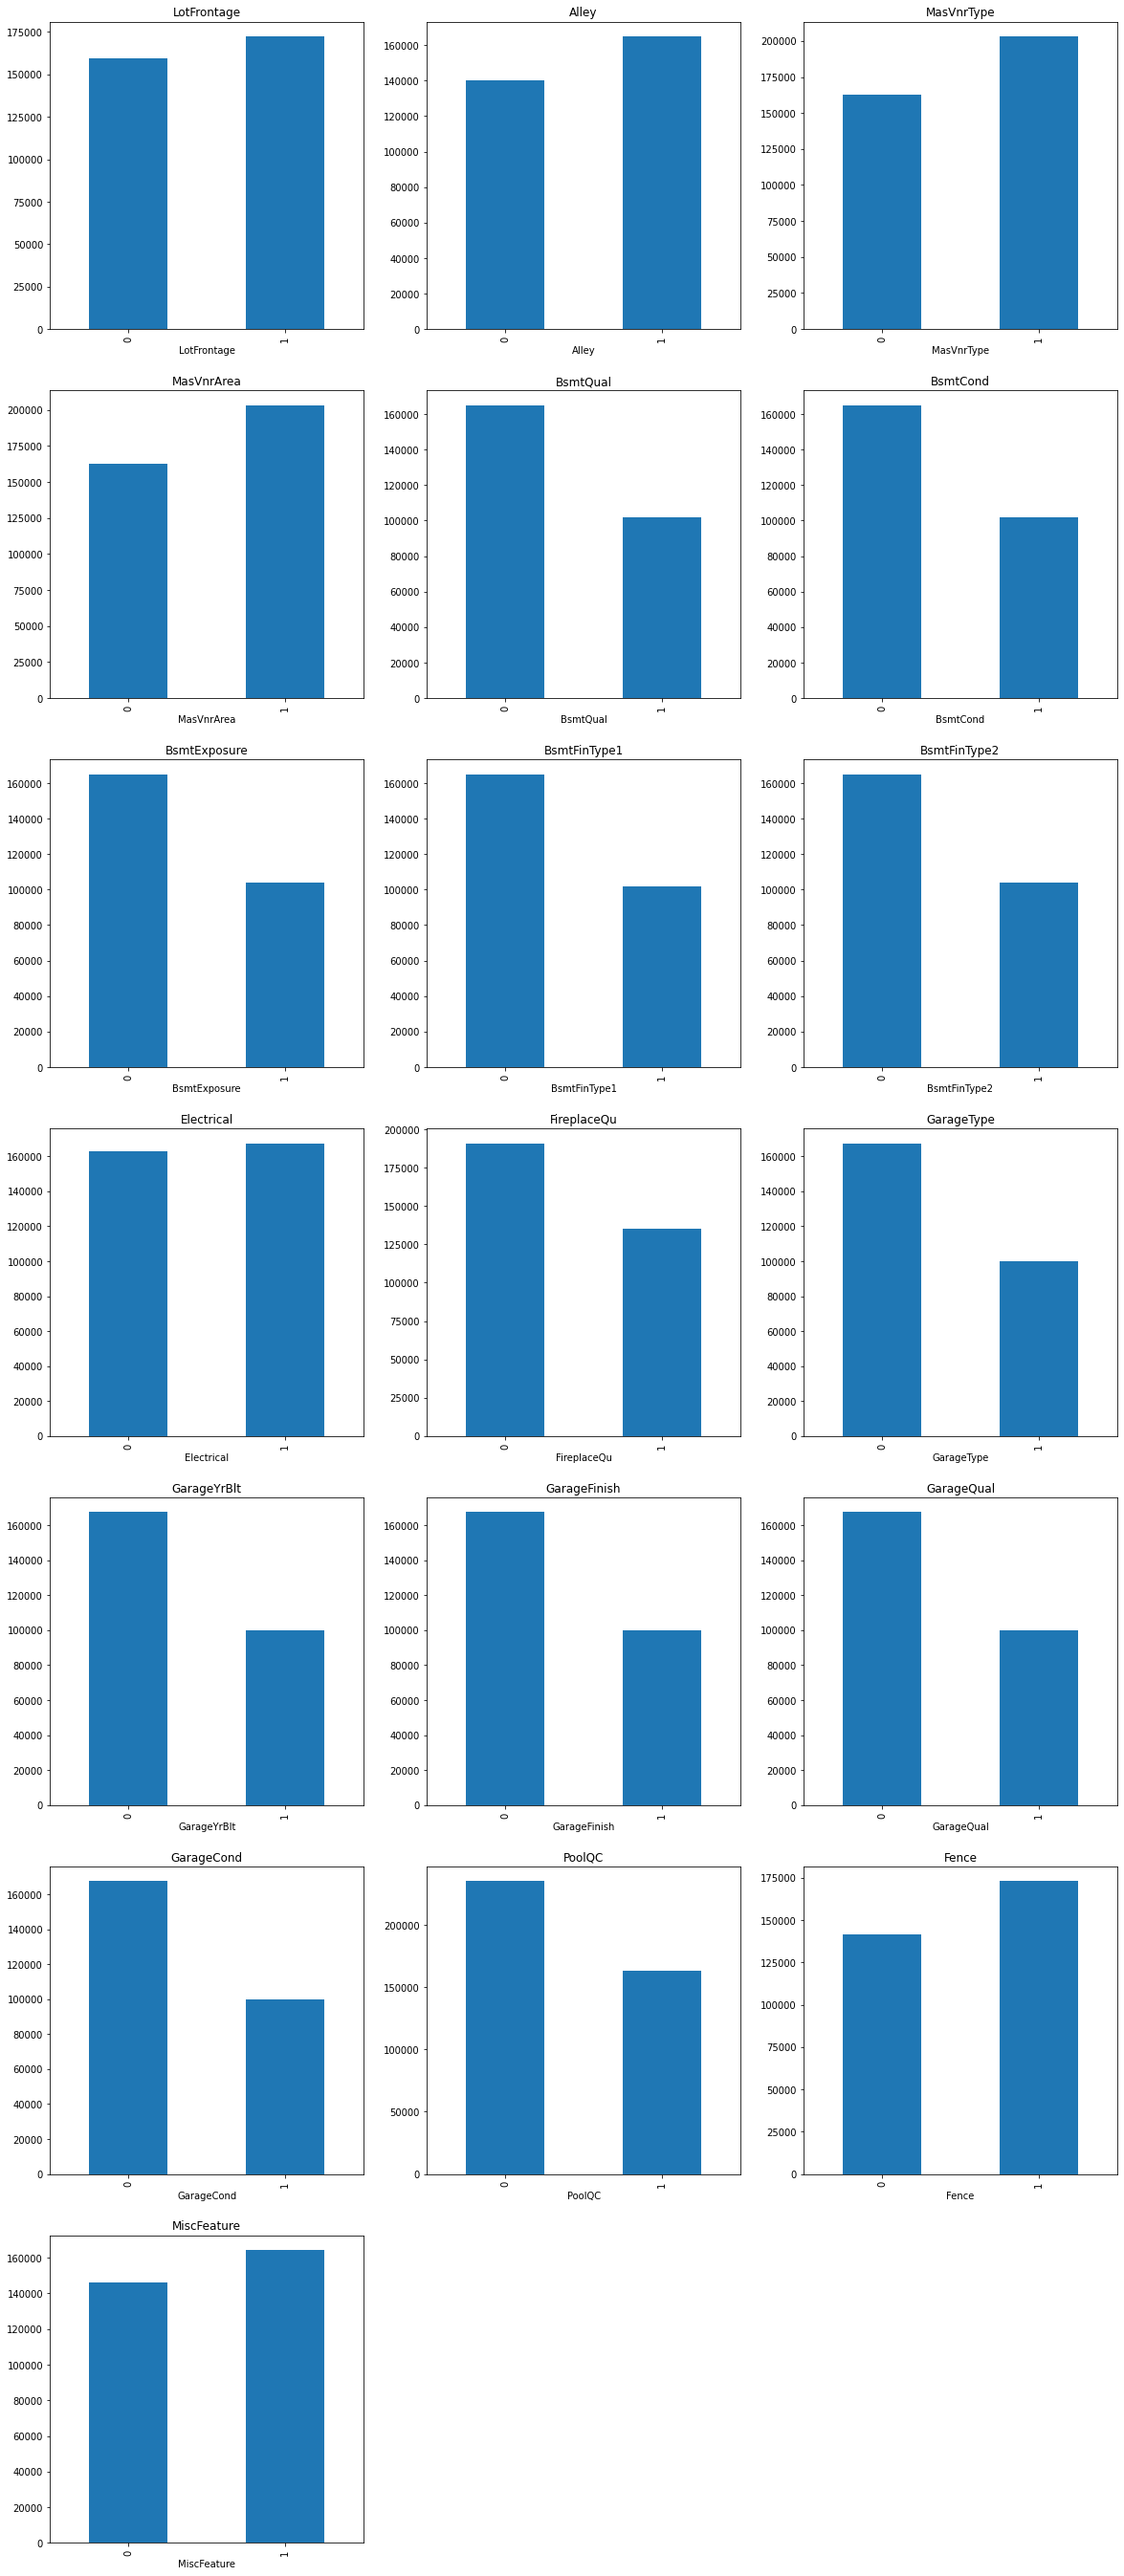

In [27]:
plot_bar_with_missing(df, num_attrs, "SalePrice")

**NOTE:** Do some basic ispecting bofore imuting missing values

#### Missing value imputation

In [28]:
# imputing missing values for numerical features
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(df[num_attrs])

print(imputer.statistics_)

X = imputer.transform(df[num_attrs]) # X will be numpy array
df_num_tr = pd.DataFrame(X, columns=[df[num_attrs].columns], index=[df[num_attrs].index])

[5.0000e+01 6.9000e+01 9.4785e+03 6.0000e+00 5.0000e+00 1.9730e+03
 1.9940e+03 0.0000e+00 3.8350e+02 0.0000e+00 4.7750e+02 9.9150e+02
 1.0870e+03 0.0000e+00 0.0000e+00 1.4640e+03 0.0000e+00 0.0000e+00
 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 6.0000e+00 1.0000e+00
 1.9800e+03 2.0000e+00 4.8000e+02 0.0000e+00 2.5000e+01 0.0000e+00
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 6.0000e+00 2.0080e+03]


In [29]:
df_num_tr.isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,level_0,count_null
0,MSSubClass,0
1,LotFrontage,0
20,BedroomAbvGr,0
21,KitchenAbvGr,0
22,TotRmsAbvGrd,0
23,Fireplaces,0
24,GarageYrBlt,0
25,GarageCars,0
26,GarageArea,0
27,WoodDeckSF,0


In [30]:
for c in num_attrs:
    df[c] = df_num_tr[c].values

In [31]:
df[num_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
0,MSSubClass,0
1,LotFrontage,0
20,BedroomAbvGr,0
21,KitchenAbvGr,0
22,TotRmsAbvGrd,0
23,Fireplaces,0
24,GarageYrBlt,0
25,GarageCars,0
26,GarageArea,0
27,WoodDeckSF,0


#### Observations
    - we have replaced missing values with meadin using sklearn simple imputer

### Discrete Features

In [32]:
# histogram is good for numerical/discrete values
import math

def plot_hist(df, attr_list, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column) # returns next integer value
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    for i, atr in enumerate(attr_list):
        bins = df[atr].nunique() if df[atr].nunique() < 25 else 25
        plt.subplot(row, column, i+1)
        plt.hist(df[atr], bins=bins)
        plt.title(atr)
        plt.ylabel("counts")
        plt.xlabel("values")
    plt.show()

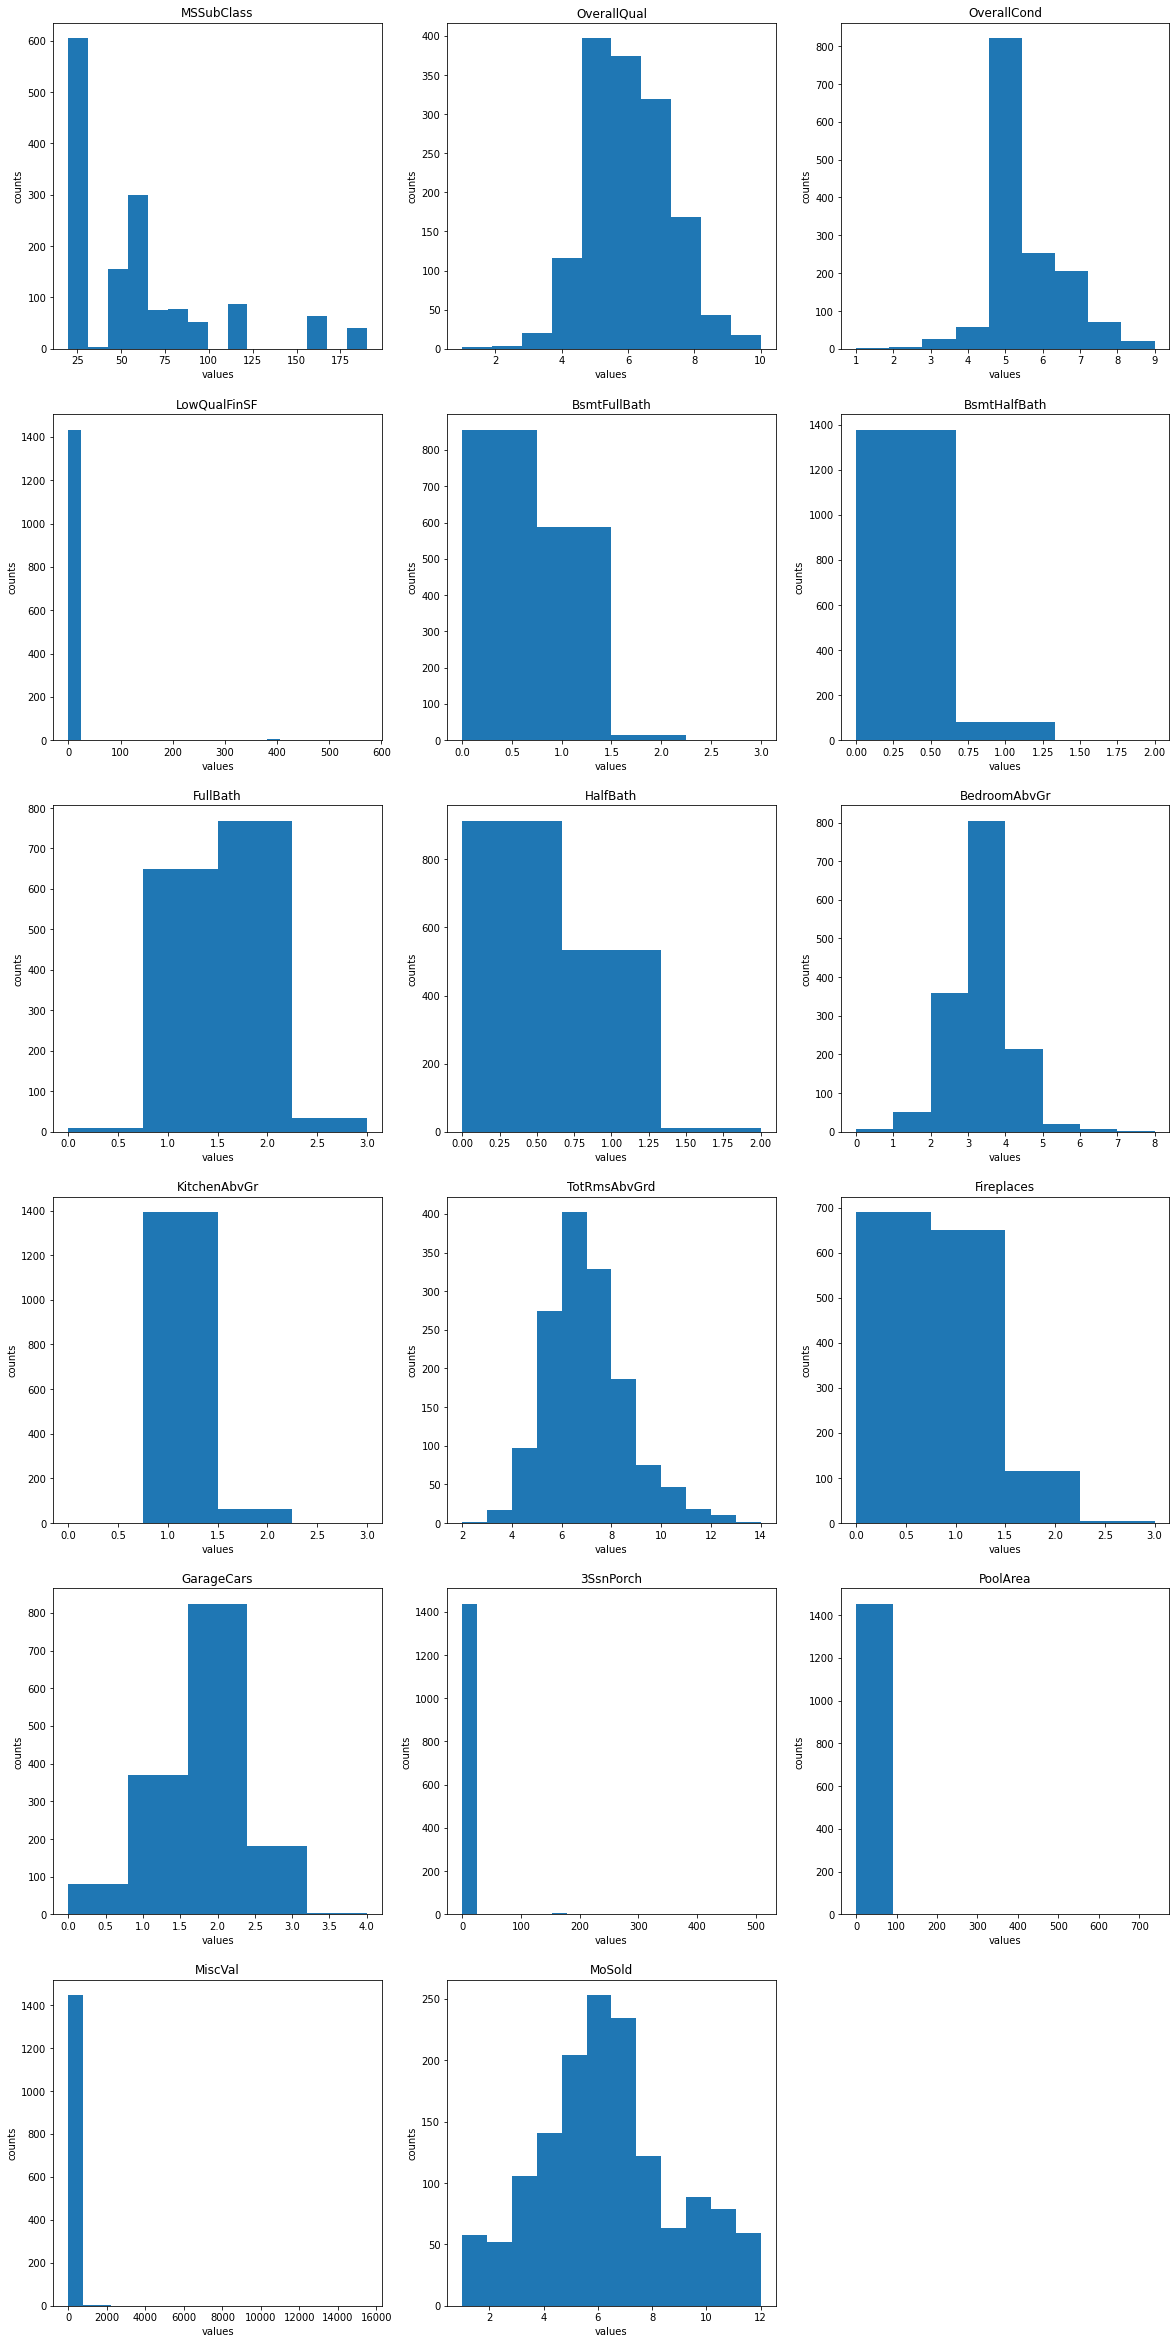

In [33]:
plot_hist(df, dis_attrs)

#### Observations
    - some of the features are biased so need to be identify with some parameters
    - some of the featuers are skewed like MSSubClass, BsmtFullBath, BsmtHalfBath, HalfBath, Fireplaces etc.

In [34]:
def get_biased_attrs(df, list_, ratio=0.9):
    """
    Function gives biased attributes with respect to ratio specified.
    
    Note:The term bias means the high frequency occurance of single value
    in whole feature set.
    """
    attrs = []
    for attr in list_:
        max_values = df[attr].value_counts(ascending=False).values[0]   
        if max_values / len(df[attr]) >= ratio: attrs.append(attr)
    return attrs

In [35]:
dis_biased_attrs = get_biased_attrs(df, dis_attrs, 0.9)
lib.update_attrs({"dis_biased_attrs": dis_biased_attrs})

attributes library updated with key:['dis_biased_attrs']


In [36]:
# numerical biased attributes are
dis_biased_attrs

['LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 '3SsnPorch',
 'PoolArea',
 'MiscVal']

#### Relation with sale price

In [37]:
def plot_hist_with(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        bins = df[attr].nunique() if df[attr].nunique() < 25 else 25
        plt.subplot(row, column, i+1)
        df.groupby(attr)[with_].median().plot.hist(bins=bins)
        plt.title(attr)
        plt.xlabel("Value")
        plt.ylabel("Count")
    plt.show()

In [38]:
# bar plot is good for categorical values
def plot_bar_with(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 8 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df.groupby(attr)[with_].median().plot.bar()
        plt.ylabel(with_)
    plt.show()
    

def plot_bar(df, attr_list, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 8 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df[attr].value_counts().plot.bar() 
        plt.title(attr)
        plt.ylabel("Counts")
    plt.show()

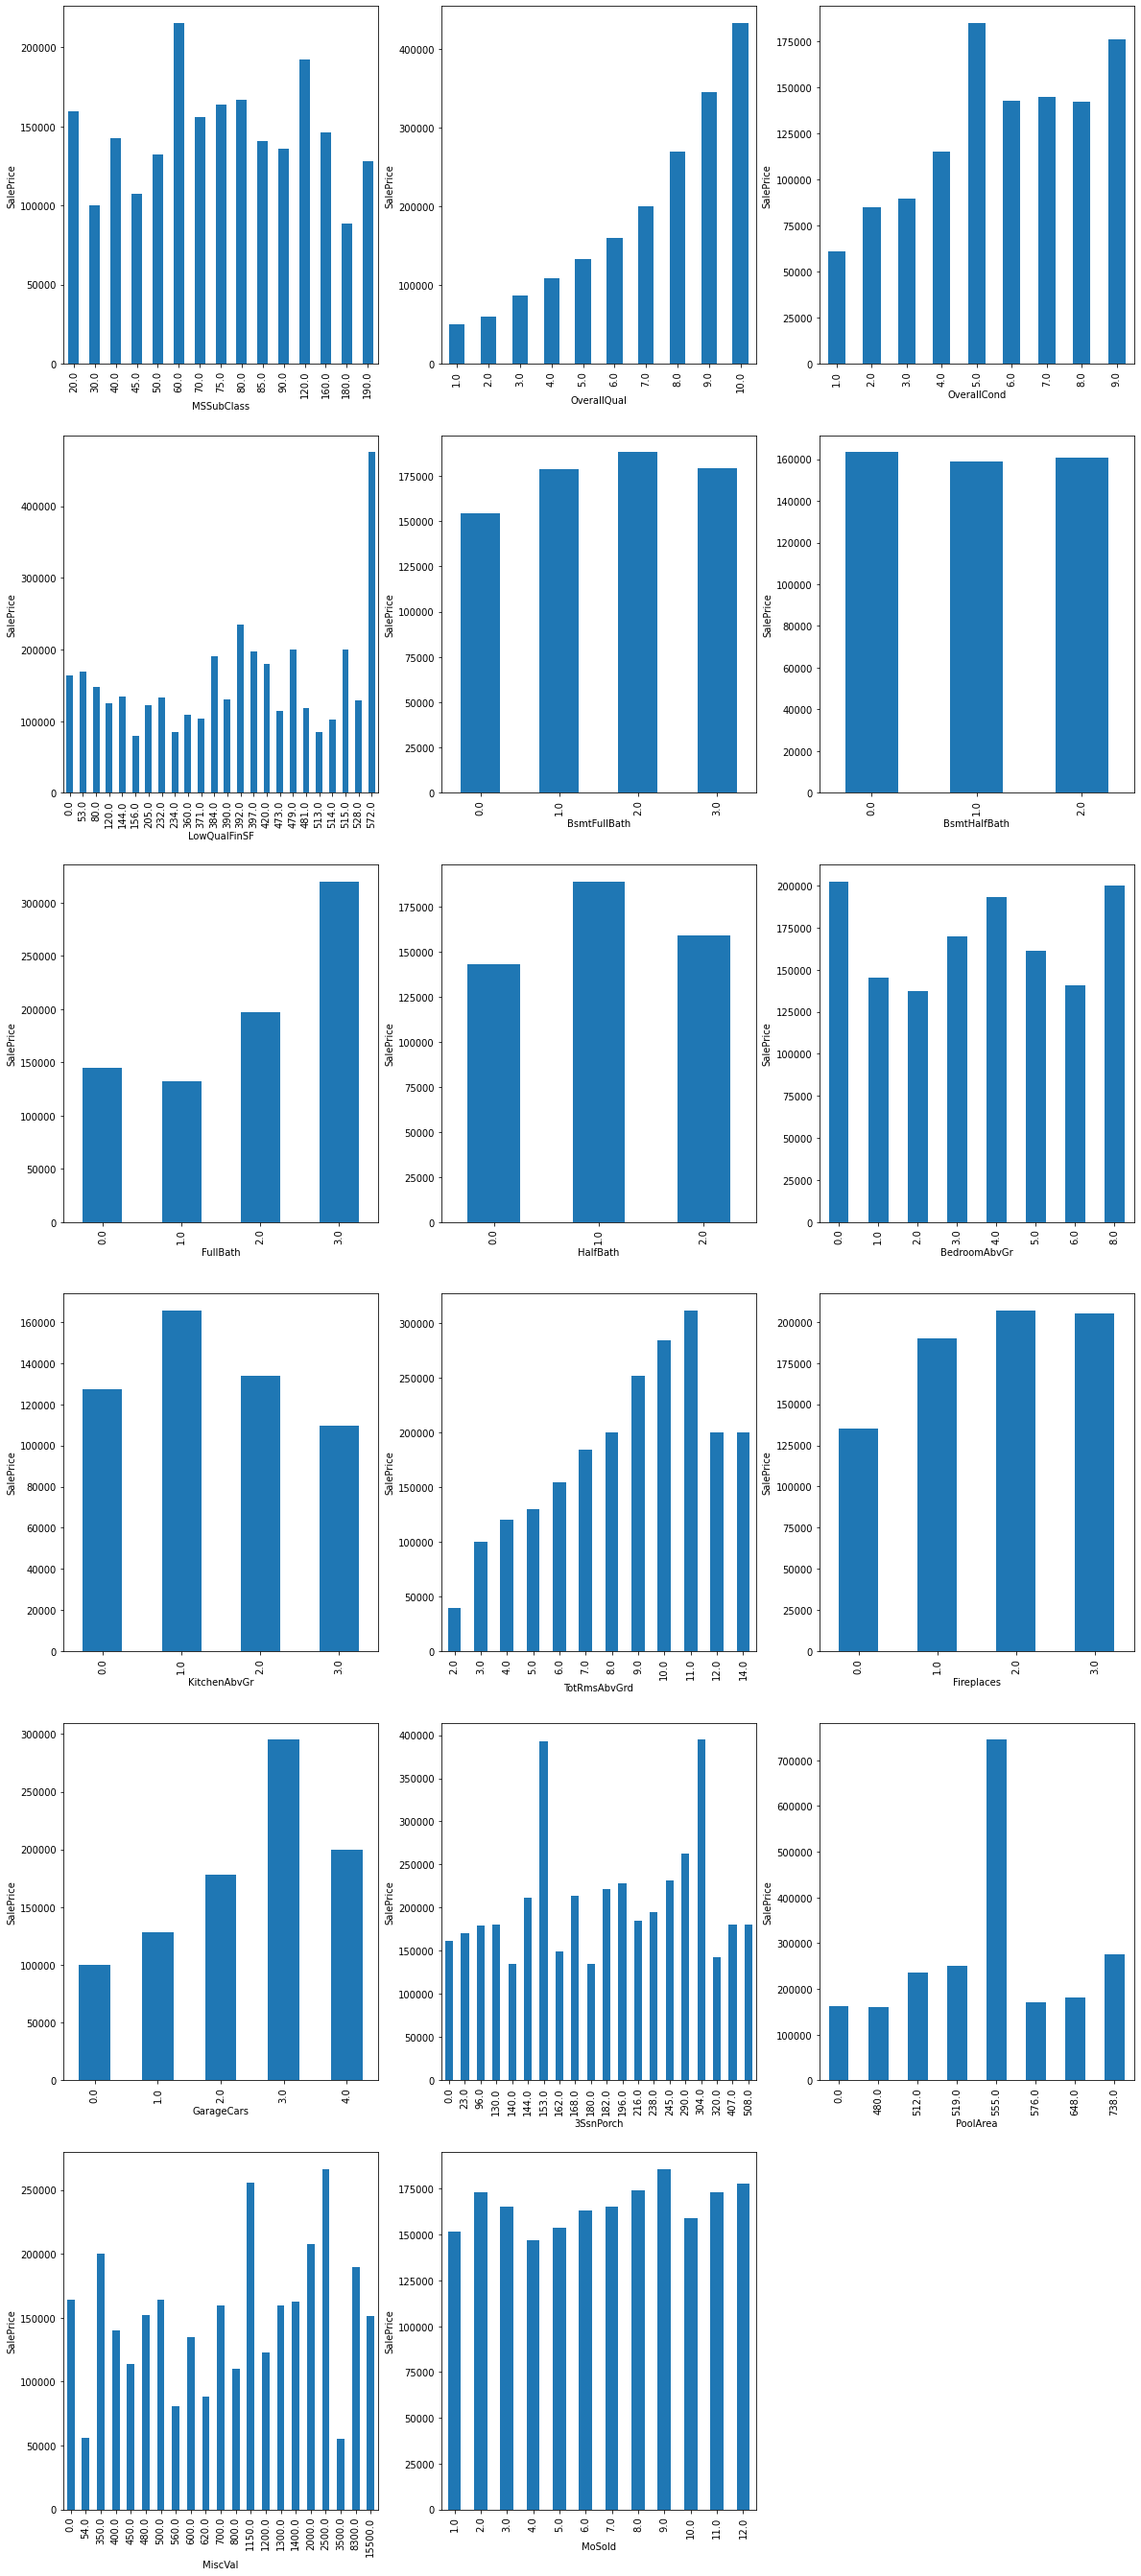

In [39]:
plot_bar_with(df, dis_attrs, "SalePrice")

#### Observations
    - some of the features having some linear realtionship with sale price.i.e. 'OverallQual' hase direct realtion with 'SalePrice', as OverallQual increases SalePrice also increses

### Continuos Features

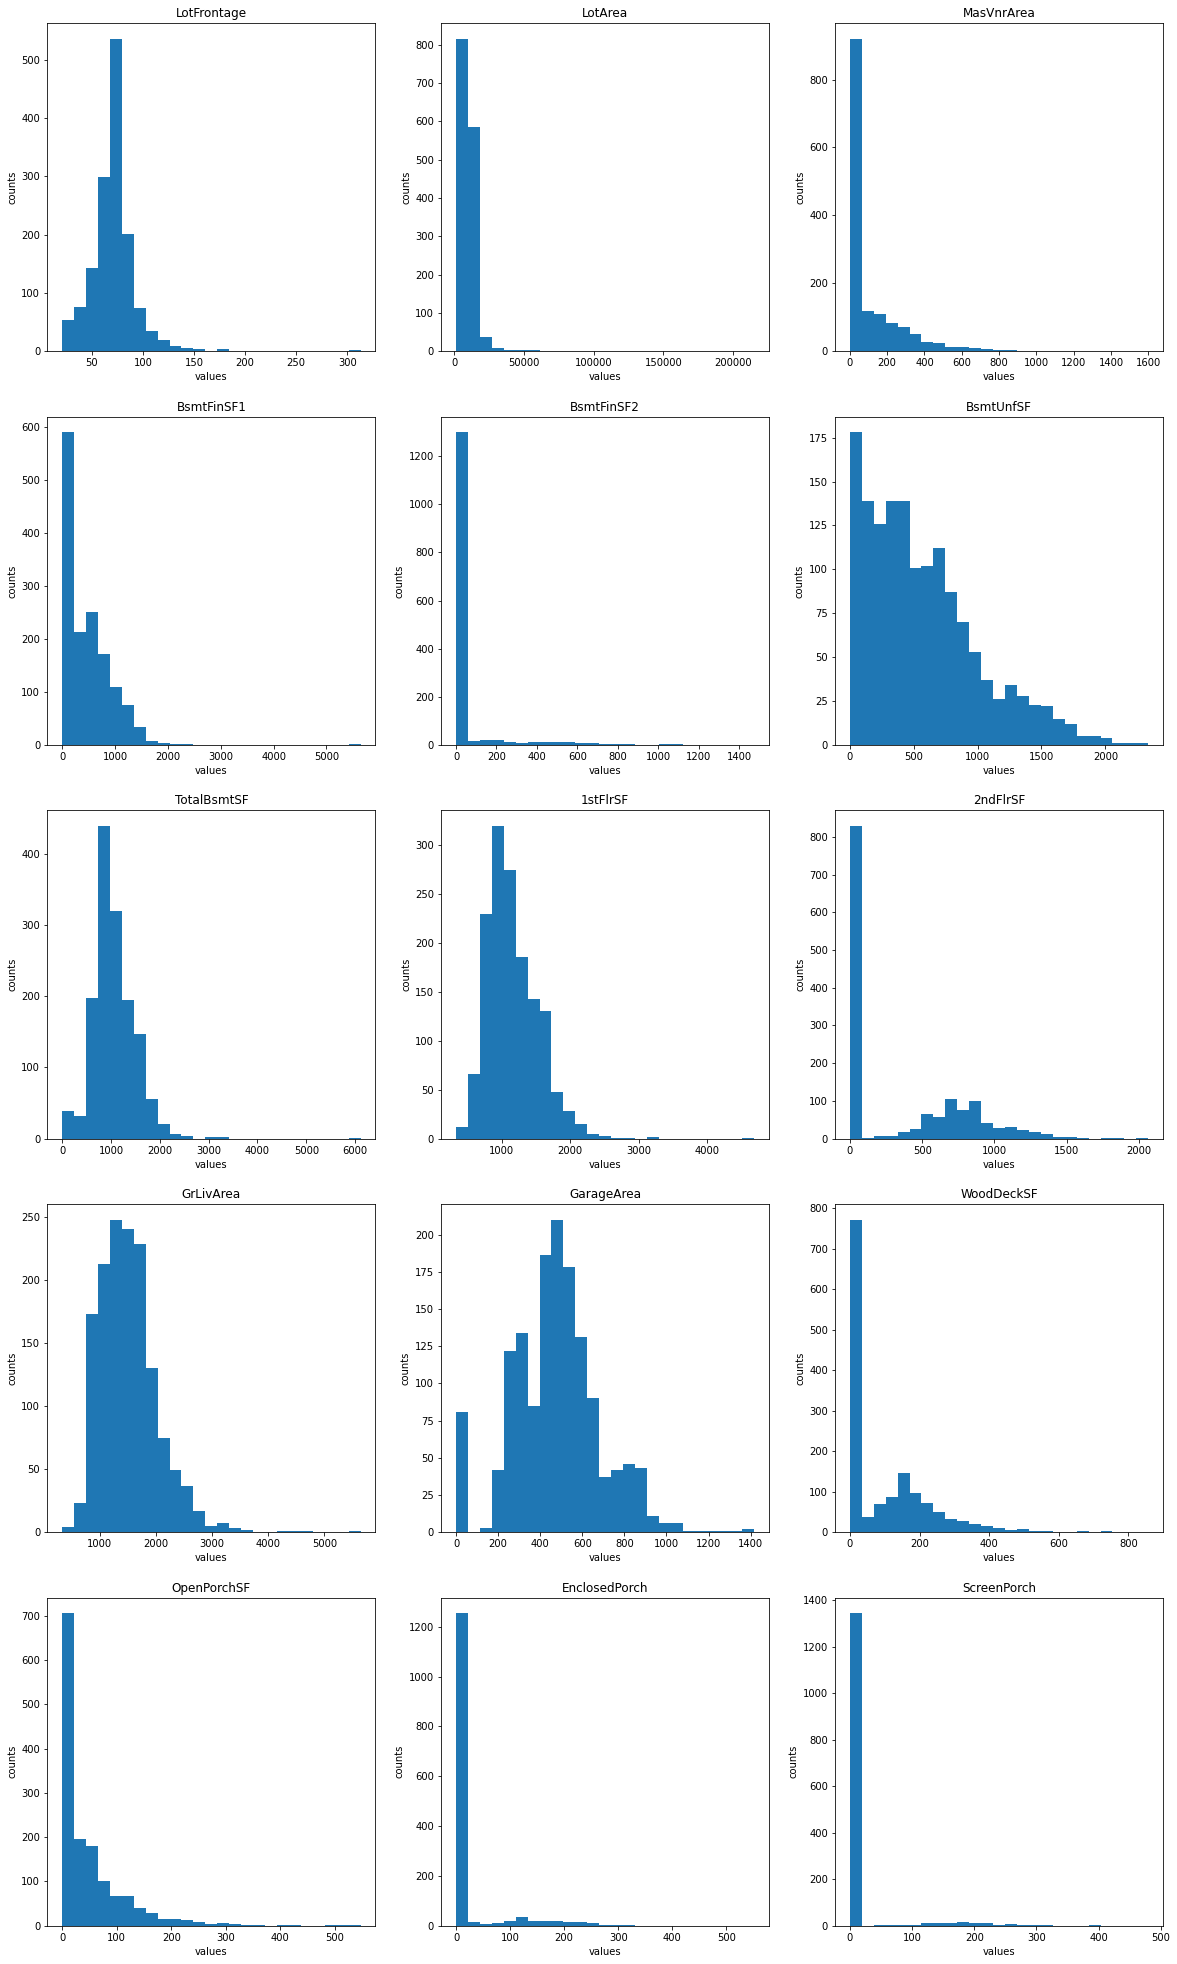

In [40]:
plot_hist(df, cont_attrs)

#### Observations
    - Here features are skewed so we can apply log-transfomation

In [41]:
# log-transformation

df_cont_tr = df[cont_attrs].copy()
for attr in cont_attrs:
    df_cont_tr[attr] = np.log1p(df[attr])

In [42]:
def plot_hist_side_by_side(df1, df2, attr_list1, attr_list2=None, column=2, width=20, height=None):
    if not attr_list2: attr_list2 = attr_list1
    assert len(attr_list1) == len(attr_list2), "attributes list having unequal length"
    row = len(attr_list1)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    attr_list = []
    for attr1, attr2 in zip(attr_list1, attr_list2):
        attr_list.append(attr1)
        attr_list.append(attr2)
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        if i%2 == 0:
            bins = df1[attr].nunique() if df1[attr].nunique() < 25 else 25
            df1[attr].plot.hist(bins=bins)
        else:
            bins = df2[attr].nunique() if df2[attr].nunique() < 25 else 25
            df2[attr].plot.hist(bins=bins)
        plt.title(attr)
        plt.xlabel("Value")
        plt.ylabel("Count")
    plt.show()

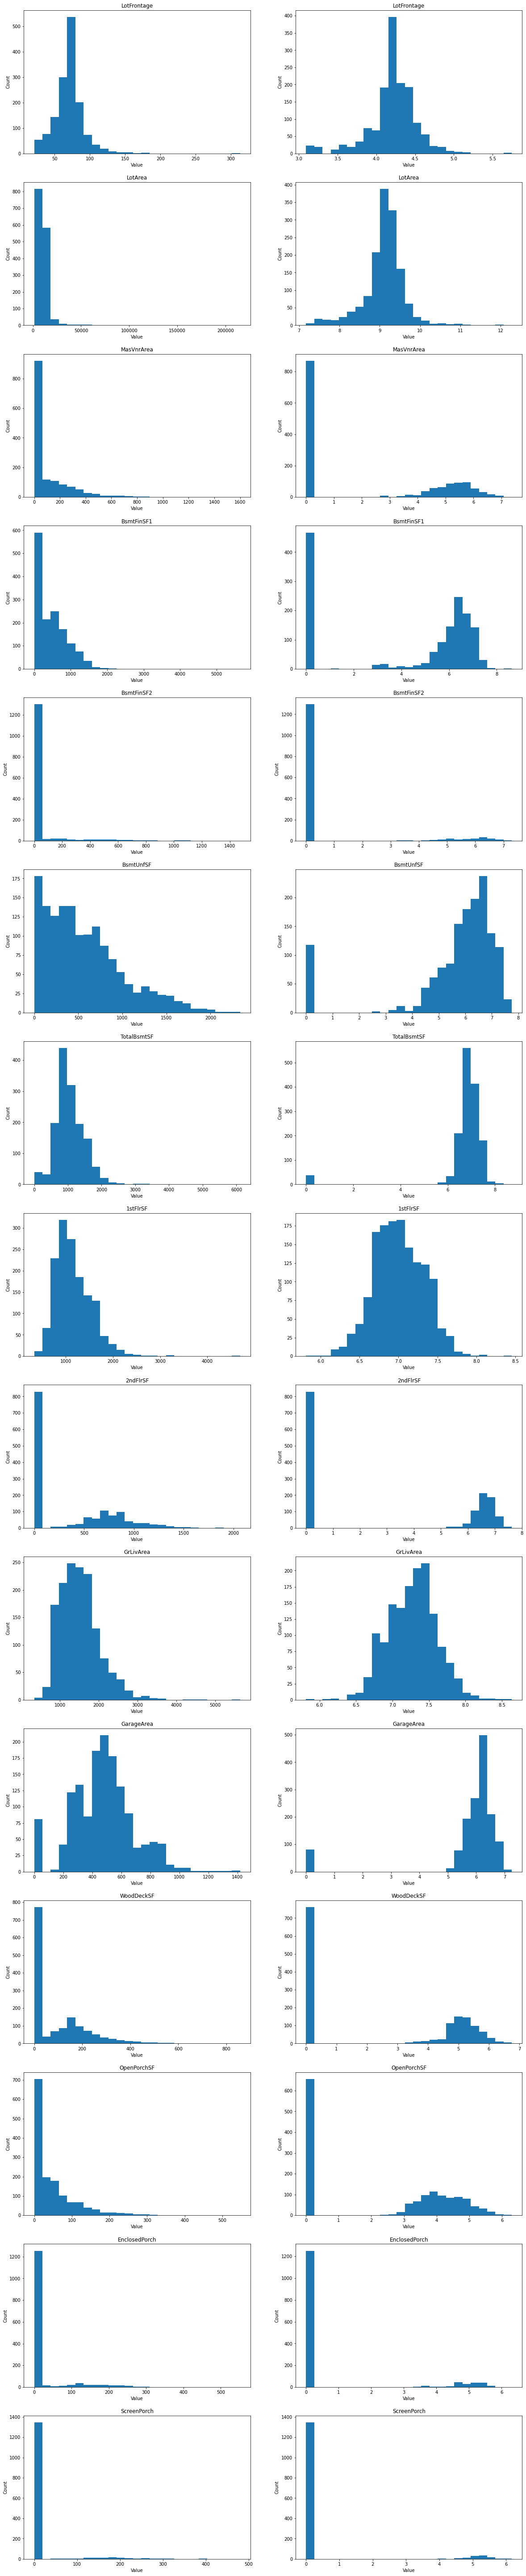

In [43]:
# comparative histogram of defaults vs log-transformed continuos features
plot_hist_side_by_side(df, df_cont_tr, cont_attrs)

#### Observations
    - some featuers are improved in terms of skewness after log-transformation

### Outliers

In [44]:
# finding outliers using boxplotting
def box_plot(df, attr_list, column=3, width=20, height=None):
    attr_list = attr_list.copy()
    for attr in attr_list:
        if 0 in df[attr].unique(): attr_list.remove(attr)
    row = math.ceil(len(attr_list)/column)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))    
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df.boxplot(column=attr)
        plt.ylabel(attr)
        plt.title(attr)
    plt.show()

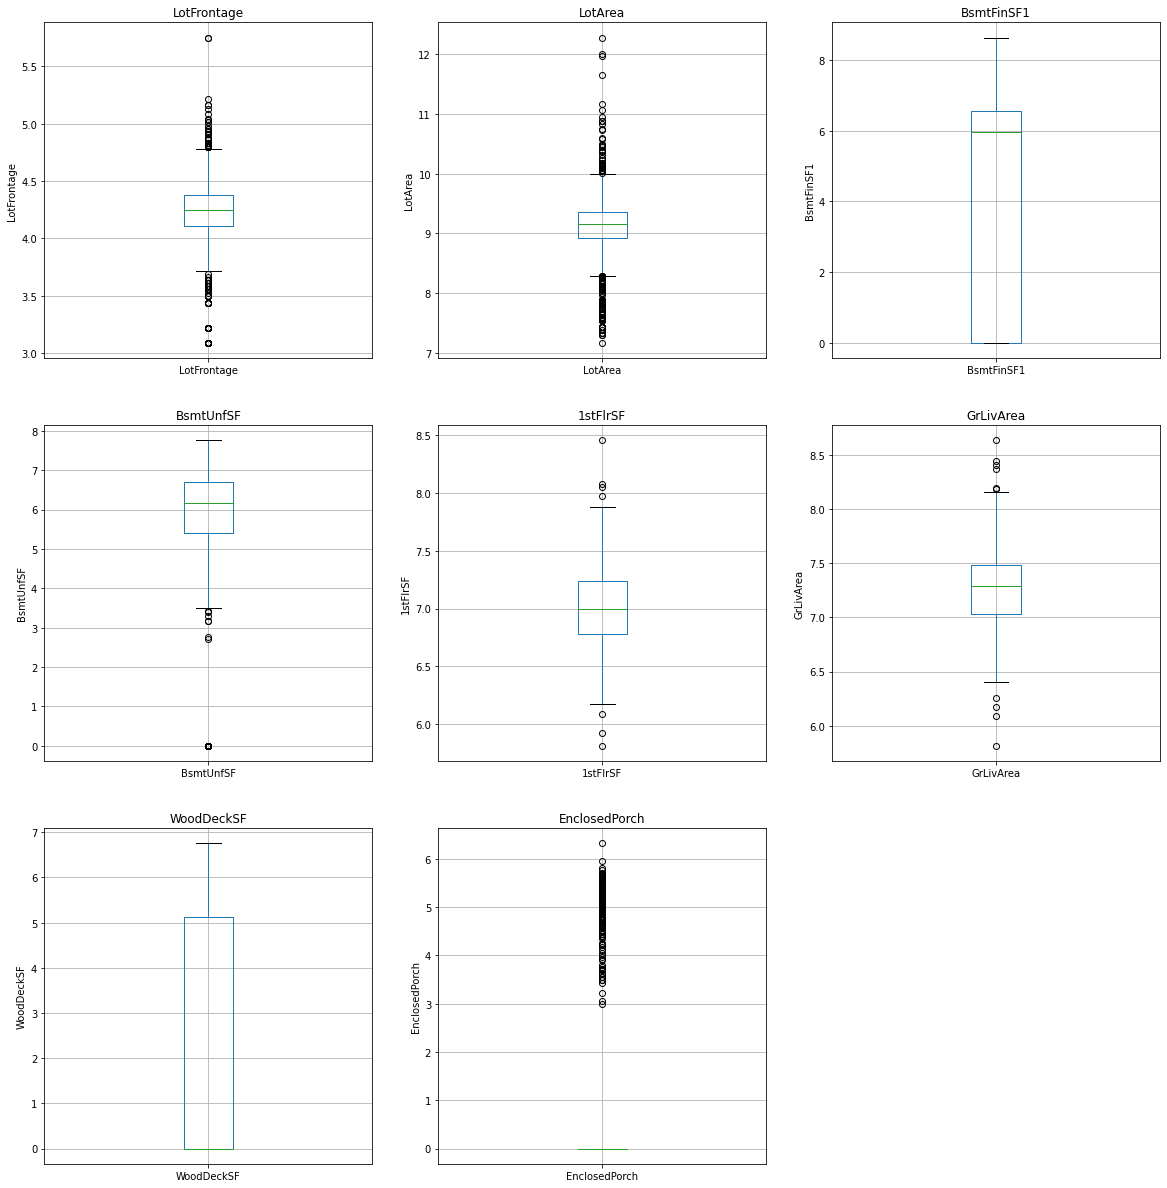

In [45]:
box_plot(df_cont_tr, cont_attrs)

#### Observations
    - Here we can see that outliers exists in some of the features

### Date Time Features

#### Relation with SalePrice

In [46]:
def plot_scatter_with(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        plt.scatter(df[attr], df[with_])
        plt.title(attr)
        plt.xlabel(attr)
        plt.ylabel(with_)
    plt.show()

In [47]:
df[date_time_attrs].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003.0,2003.0,2003.0,2008.0
1,1976.0,1976.0,1976.0,2007.0
2,2001.0,2002.0,2001.0,2008.0
3,1915.0,1970.0,1998.0,2006.0
4,2000.0,2000.0,2000.0,2008.0


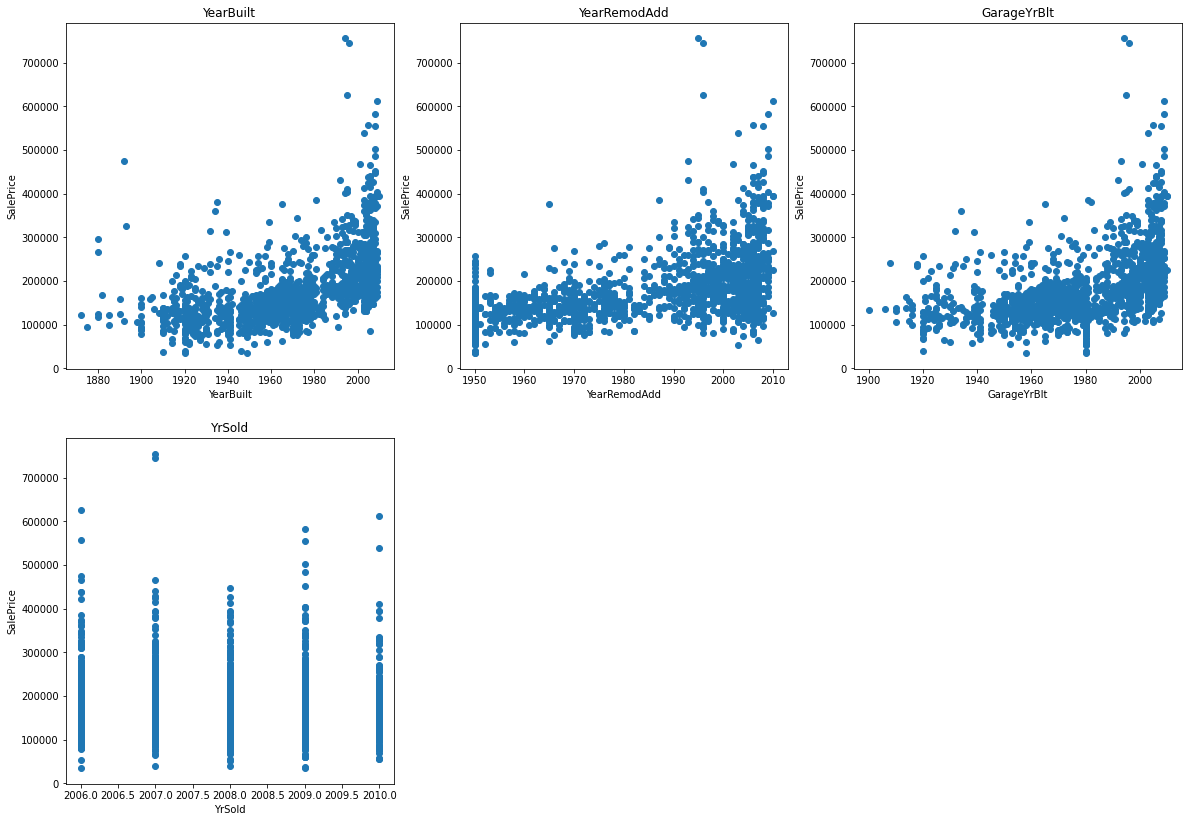

In [48]:
plot_scatter_with(df, date_time_attrs, "SalePrice")

#### Observations
    - as YearBuilt, YearRemodAdd and GarageYrBlt is more recent then SalePrice is significantlly high
    - yearRemodAdd is caped at 1950

### Finding the correlation

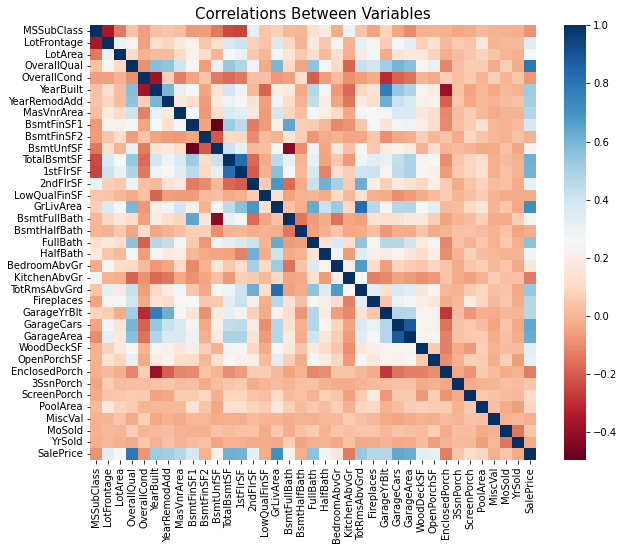

In [49]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap="RdBu")
plt.title("Correlations Between Variables", size=15)
plt.show()

In [365]:
class Correlatiion:
    
    def __init__(self, df, attrs_list, core_with, ratio=0):
        attrs_list_copy = attrs_list.copy()
        if core_with not in attrs_list_copy: attrs_list_copy.append(core_with)
        self.df = df
        self.attrs_list = attrs_list_copy
        self.core_with = core_with
        self.ratio = ratio
        self.imp = []
        self.all = []
    
    def get_imp_cor_attrs(self):
        if not self.imp: self.find_corr()
        return self.imp

    def find_corr(self):
        corr_matrix = self.df[self.attrs_list].corr()
        srs = corr_matrix[self.core_with].sort_values(ascending=False)
        for index, value in zip(srs.index, srs.values):
            if abs(value) >= self.ratio and index != self.core_with :
                self.imp.append(index)
            self.all.append((index, value))

In [51]:
corr_ = Correlatiion(df, num_attrs, "SalePrice", ratio=0.5)
corr_.find_corr()
num_imp_corr_attrs = corr_.get_imp_cor_attrs()
lib.update_attrs({"num_imp_corr_attrs": num_imp_corr_attrs})

attributes library updated with key:['num_imp_corr_attrs']


In [52]:
corr_.all

[('SalePrice', 1.0),
 ('OverallQual', 0.7909816005838053),
 ('GrLivArea', 0.7086244776126515),
 ('GarageCars', 0.6404091972583519),
 ('GarageArea', 0.6234314389183622),
 ('TotalBsmtSF', 0.6135805515591943),
 ('1stFlrSF', 0.6058521846919153),
 ('FullBath', 0.5606637627484453),
 ('TotRmsAbvGrd', 0.5337231555820284),
 ('YearBuilt', 0.5228973328794967),
 ('YearRemodAdd', 0.5071009671113866),
 ('MasVnrArea', 0.4726144990045735),
 ('Fireplaces', 0.46692883675152763),
 ('GarageYrBlt', 0.4667536523633407),
 ('BsmtFinSF1', 0.3864198062421535),
 ('LotFrontage', 0.3347708531397599),
 ('WoodDeckSF', 0.32441344456812926),
 ('2ndFlrSF', 0.31933380283206736),
 ('OpenPorchSF', 0.31585622711605504),
 ('HalfBath', 0.28410767559478256),
 ('LotArea', 0.2638433538714051),
 ('BsmtFullBath', 0.22712223313149427),
 ('BsmtUnfSF', 0.21447910554696928),
 ('BedroomAbvGr', 0.16821315430073963),
 ('ScreenPorch', 0.11144657114291112),
 ('PoolArea', 0.09240354949187318),
 ('MoSold', 0.046432245223819446),
 ('3SsnPorc

#### Observations
    - we can clearly identify highly correlated features. it only shows linear relationship not non-linear

### Adding new derived features

In [53]:
lib.attrs["num_attrs"]

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### Does combination of overallqual and overallcond improves the correlation with saleprice?

In [54]:
cont_attrs

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch']

In [55]:
df["NewOverallQual"] = df["OverallQual"] + df["OverallCond"]
temp_attrs = ["NewOverallQual", "OverallQual", "OverallCond"]
df[temp_attrs+labels].corr()[labels[0]].sort_values(ascending=False)

SalePrice         1.000000
OverallQual       0.790982
NewOverallQual    0.594786
OverallCond      -0.077856
Name: SalePrice, dtype: float64

####  Obeservations
    - new feature has more than 50% correlation with saleprice but not much impressive

In [56]:
df.drop(["NewOverallQual"], axis=1, inplace=True)

#### Does combination of LotArea and GrLivArea make impact on correlaiton with saleprice?

In [57]:
df["NewArea"] = df["LotArea"] + df["GrLivArea"]
temp_attrs = ["NewArea", "LotArea", "GrLivArea"]
df[temp_attrs+labels].corr()[labels[0]].sort_values(ascending=False)

SalePrice    1.000000
GrLivArea    0.708624
NewArea      0.296663
LotArea      0.263843
Name: SalePrice, dtype: float64

#### Observations
    - new feature does not make any significant impact on correlation

In [58]:
df.drop(["NewArea"], axis=1, inplace=True)

#### Does combination of YearRemodAdd and TotalBsmtSF make impact on correlaiton with saleprice?

In [59]:
df["NewBsmtSF"] = df["YearRemodAdd"] + df["TotalBsmtSF"]
temp_attrs = ["NewBsmtSF", "YearRemodAdd", "TotalBsmtSF"]
df[temp_attrs+labels].corr()[labels[0]].sort_values(ascending=False)

SalePrice       1.000000
NewBsmtSF       0.628212
TotalBsmtSF     0.613581
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

#### Observations
    - new feature does make little impact on correlation

In [60]:
df.drop(["NewBsmtSF"], axis=1, inplace=True)

#### Does combination of 1stFlrSF and 2ndFlrSF make impact on correlaiton with saleprice?

In [61]:
df["NewFlrSF"] = df["1stFlrSF"] + df["2ndFlrSF"]
temp_attrs = ["NewFlrSF", "1stFlrSF", "2ndFlrSF"]
df[temp_attrs+labels].corr()[labels[0]].sort_values(ascending=False)

SalePrice    1.000000
NewFlrSF     0.716883
1stFlrSF     0.605852
2ndFlrSF     0.319334
Name: SalePrice, dtype: float64

#### Observations
    - new feature does make significant impact on correlation

In [62]:
df.drop(["NewFlrSF"], axis=1, inplace=True)

## EDA for Categorical Features

Categorical data can be classified into ordinal data and nominal data. In the case of an ordinal type, there is a difference in importance for each level. This value plays an important role in the case of regression, so encode it with care.

It is difficult to encode categorical features compared to numeric features. For ordinal data, it is more difficult.

**NOTE:** In the regression problem, discrete and non-order features must be converted to one-hot encoding.

### Separate to nominal and ordinal feature
    - In some cases, it is easy to judge that there is an order on a commonsense level. However, there are many cases where it is difficult to judge that there is an order. The method used in this notebook to determine whether the features are ordinal or not was determined to have a certain order through visualization. However, if you have real estate knowledge, you will be able to determine the order of each level by classifying ordinal features smarter than me. 

In [63]:
for i, attr in enumerate(lib.attrs["cat_attrs"]):
    print(i, attr)

0 MSZoning
1 Street
2 Alley
3 LotShape
4 LandContour
5 Utilities
6 LotConfig
7 LandSlope
8 Neighborhood
9 Condition1
10 Condition2
11 BldgType
12 HouseStyle
13 RoofStyle
14 RoofMatl
15 Exterior1st
16 Exterior2nd
17 MasVnrType
18 ExterQual
19 ExterCond
20 Foundation
21 BsmtQual
22 BsmtCond
23 BsmtExposure
24 BsmtFinType1
25 BsmtFinType2
26 Heating
27 HeatingQC
28 CentralAir
29 Electrical
30 KitchenQual
31 Functional
32 FireplaceQu
33 GarageType
34 GarageFinish
35 GarageQual
36 GarageCond
37 PavedDrive
38 PoolQC
39 Fence
40 MiscFeature
41 SaleType
42 SaleCondition


In [64]:
cat_ord_attrs = ["MSZoning", "Condition1", "Condition2", "HouseStyle", "MasVnrType", 
        "Foundation", "GarageType", "GarageFinish", "PavedDrive", "SaleCondition", 
        "Exterior1st" , "Exterior2nd", "BsmtExposure", "BsmtFinType1", "ExterQual", 
        "ExterCond", "HeatingQC", "BsmtQual", "BsmtCond", "FireplaceQu", "GarageQual", "PoolQC", "KitchenQual"]

# temporary object
cat1 = ['Alley', "MasVnrType", "GarageType", "GarageCond", "Fence", "Street", 
       "LotShape", "LandContour", "BsmtFinType1", "BsmtFinType2", "CentralAir", 
       "MiscFeature", "Utilities", "SaleCondition"," Functional"]
cat2 = ["MSZoning", "PoolQC", "BsmtQual", "BsmtCond", "FireplaceQu", "GarageFinish", 
        "GarageQual", "BsmtExposure", "Electrical", "Exterior1st", "Exterior2nd", "KitchenQual", "SaleType"]

# cat1 is more related to nominal categoires and cat2 is more related to ordinal categories

# as having less domain-knowledge I have selected above category as per ref below
# ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features

In [65]:
cat_nom_attrs = [attr for attr in cat_attrs if attr not in cat_ord_attrs]

In [66]:
lib.update_attrs({"cat_nom_attrs": cat_nom_attrs, "cat_ord_attrs": cat_ord_attrs})

attributes library updated with key:['cat_nom_attrs', 'cat_ord_attrs']


#### Handling Missing Values

In [67]:
df[cat_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
38,PoolQC,1453
40,MiscFeature,1406
2,Alley,1369
39,Fence,1179
32,FireplaceQu,690
33,GarageType,81
36,GarageCond,81
35,GarageQual,81
34,GarageFinish,81
25,BsmtFinType2,38


#### Relationship of missing values with target variable

In [68]:
def plot_bar_with_missing(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 7 if not height else height
    plt.figure(figsize=(width, height))
    
    attr_list = [attr for attr in df.columns if df[attr].isnull().sum()>=1]
    
    data = df.copy()
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        data[attr] = np.where(data[attr].isnull(), 1, 0)
        data.groupby(attr)[with_].median().plot.bar()
        plt.title(attr)
    plt.show()
    
    del data

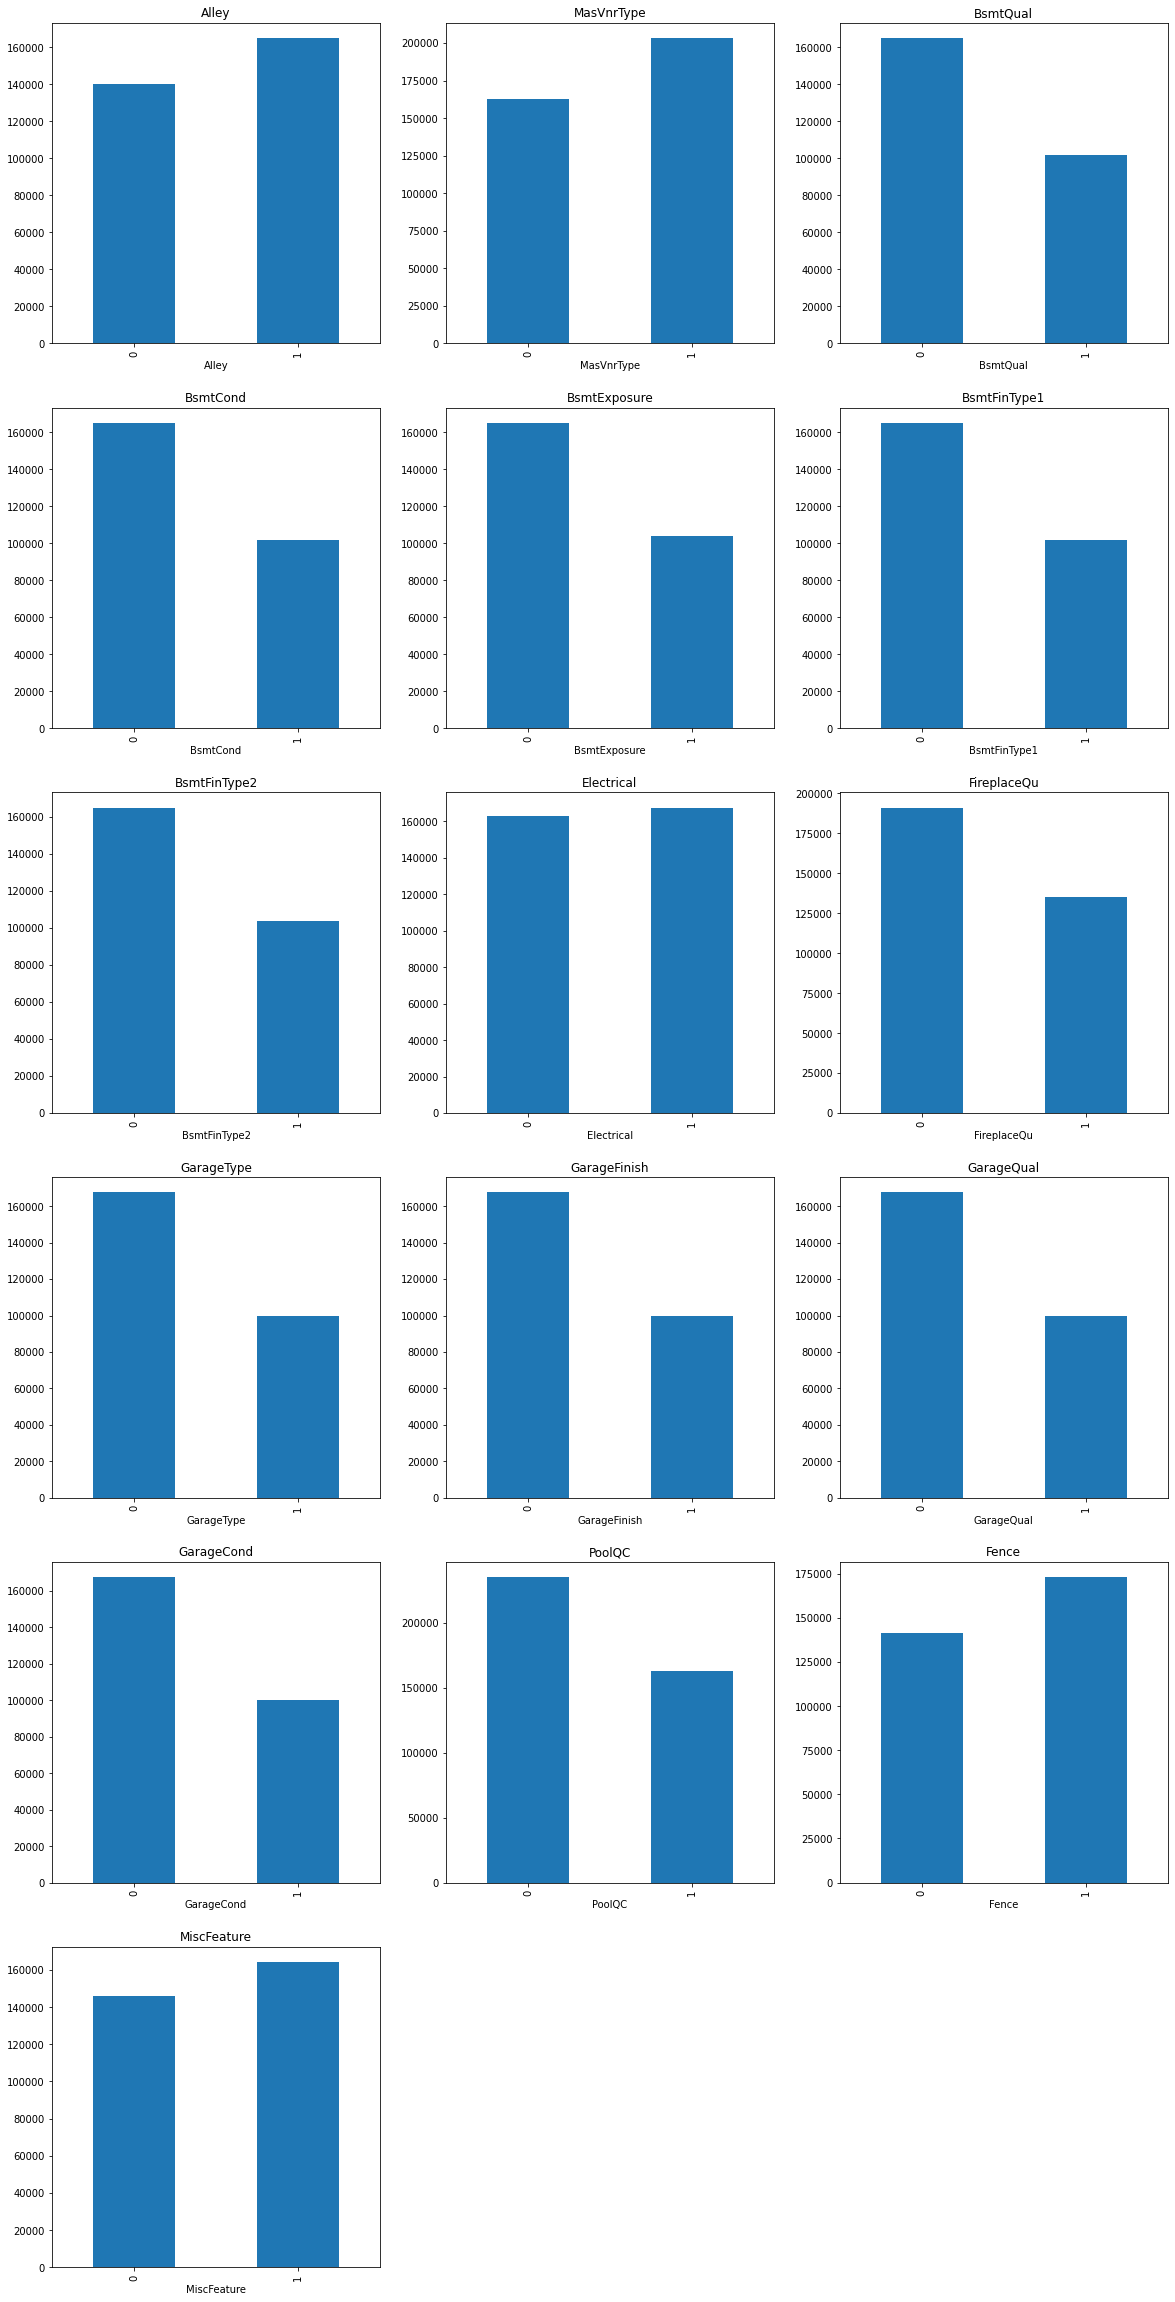

In [69]:
plot_bar_with_missing(df, cat_attrs, "SalePrice")

**NOTE:** Some basic inspections should be done before replacing the missing values

#### Replacing Missing Values
 - Missing values can be replaced with, an arbitory text like 'missing', 'none' etc, or most frequent category in that feature

In [70]:
# most frequent categorical substitution
# df['MSZoning'] = df['MSZoning'].fillna(df['MSZoning'].mode()[0])

In [71]:
# arbitory text substitution for nominal categories
for attr in cat_nom_attrs:
    df[attr] = df[attr].fillna("missing")

In [72]:
# most fequent categorical substitution for ordinal categorical feature
for attr in cat_ord_attrs:
    df[attr] = df[attr].fillna(df[attr].mode()[0])

In [73]:
df[cat_attrs].isnull().sum().reset_index().rename(
    columns={0: "count_null", "index": "variable"}).sort_values(
    "count_null", ascending=False).head(25)

,variable,count_null
0,MSZoning,0
32,FireplaceQu,0
24,BsmtFinType1,0
25,BsmtFinType2,0
26,Heating,0
27,HeatingQC,0
28,CentralAir,0
29,Electrical,0
30,KitchenQual,0
31,Functional,0


#### Encoding ordinal categorical features
    ref: https://www.kaggle.com/ohseokkim/house-price-all-about-house-price#Doing-EDA-for-Categorical-Features

In [74]:
df['MSZoning'] = df['MSZoning'].replace({'C (all)':1,'RM':2,'RH':3,'RL':4,'FV':5})

In [75]:
df['Condition1'] = df['Condition1'].replace({'Artery':1,
                                             'RRAe':1,
                                             'RRNn':1,
                                             'Feedr':1,
                                             'RRNe':1,
                                             'RRAn':1,
                                             'Norm':2,
                                             'PosA':3,
                                             'PosN':3})

In [76]:
df['Condition2'] = df['Condition2'].replace({'RRNn':1,
                                             'Artery':2, 
                                             'Feedr':2,
                                             'RRAn':2,
                                             'RRAe':2,    
                                             'Norm':2,
                                             'PosA':3,
                                             'PosN':3})

In [77]:
def HouseStyleToInt(x):
    if(x=='1.5Unf'):
        r = 0
    elif(x=='SFoyer'):
        r = 1
    elif(x=='1.5Fin'):
        r = 2
    elif(x=='2.5Unf'):
        r = 3
    elif(x=='SLvl'):
        r = 4
    elif(x=='1Story'):
        r = 5
    elif(x=='2Story'):
        r = 6  
    elif(x==' 2.5Fin'):
        r = 7          
    else:
        r = 8
    return r

df['HouseStyle'] = df['HouseStyle'].apply(HouseStyleToInt)

In [78]:
def MasVnrTypeToInt(x):
    if(x=='Stone'):
        r = 3
    elif(x=='BrkFace'):
        r = 2
    elif(x=='BrkCmn'):
        r = 1        
    else:
        r = 0
    return r

df['MasVnrType'] = df['MasVnrType'].apply(MasVnrTypeToInt)

In [79]:
foundation_label = {'Slab':1,'BrkTil':2,'Stone':2,'CBlock':3,'Wood':4,'PConc':5}
df['Foundation'] = df['Foundation'].replace(foundation_label)

In [80]:
garagetype_label = {'CarPort':1,'Basment':2,'Detchd':2,'Attchd':3,'2Types':3,'BuiltIn':4}
df['GarageType'] = df['GarageType'].replace(garagetype_label)

In [81]:
df['GarageFinish'] = df['GarageFinish'].replace({'Unf':1,'RFn':2,'Fin':3})

In [82]:
df['PavedDrive'] = df['PavedDrive'].replace({'N':1,'P':2,'Y':3})

In [83]:
salecon_label = {'AdjLand':1,'Abnorml':2,'Family':2,'Alloca':2,'Normal':3,'Partial':4}
df['SaleCondition'] = df['SaleCondition'].replace(salecon_label)

In [84]:
ext_lable = {'AsbShng':1,'AsphShn':1,
             'MetalSd':2,'Wd Sdng':2,'WdShing':2, 'Wd Shng':2,'Stucco':2,'CBlock':2,
             'HdBoard':3,'BrkFace':3,'Plywood':3,'Other':3,
             'VinylSd':4,'CemntBd':4,'BrkComm':4,'CmentBd':4,'Brk Cmn':4,
             'Stone':5,'ImStucc':5 }
df['Exterior1st'] = df['Exterior1st'].replace(ext_lable)
df['Exterior2nd'] = df['Exterior2nd'].replace(ext_lable)

In [85]:
def BsmtExposureToInt(x):
    if(x=='Gd'):
        r = 4
    elif(x=='Av'):
        r = 3
    elif(x=='Mn'):
        r = 2
    elif(x=='No'):
        r = 1
    else:
        r = 0
    return r

df['BsmtExposure'] = df['BsmtExposure'].apply(BsmtExposureToInt)

In [86]:
def BsmtFinType1ToInt(x):
    if(x=='GLQ'):
        r = 6
    elif(x=='ALQ'):
        r = 5
    elif(x=='BLQ'):
        r = 4
    elif(x=='Rec'):
        r = 3   
    elif(x=='LwQ'):
        r = 2
    elif(x=='Unf'):
        r = 1        
    else:
        r = 0
    return r

df['BsmtFinType1'] = df['BsmtFinType1'].apply(BsmtFinType1ToInt)

In [87]:
quality_label = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

df['ExterQual'] = df['ExterQual'].replace(quality_label)
df['ExterCond'] = df['ExterCond'].replace(quality_label)
df['KitchenQual'] = df['KitchenQual'].replace(quality_label)
df['HeatingQC'] = df['HeatingQC'].replace(quality_label)
df['BsmtQual'] = df['BsmtQual'].replace(quality_label)
df['BsmtCond'] = df['BsmtCond'].replace(quality_label)
df['FireplaceQu'] = df['FireplaceQu'].replace(quality_label)
df['GarageQual'] = df['GarageQual'].replace(quality_label)
df['PoolQC'] = df['PoolQC'].replace(quality_label)

In [88]:
df[cat_ord_attrs].head()

,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual
0,4,2,2,6,2,5,3,2,3,3,4,4,1,6,4,3,5,4,3,4,3,4,4
1,4,1,2,5,0,3,3,2,3,3,2,2,4,5,3,3,5,4,3,3,3,4,3
2,4,2,2,6,2,5,3,2,3,3,4,4,2,6,4,3,5,4,3,3,3,4,4
3,4,2,2,6,0,2,2,1,3,2,2,2,1,5,3,3,4,3,4,4,3,4,4
4,4,2,2,6,2,5,3,2,3,3,4,4,3,6,4,3,5,4,3,3,3,4,4


####  Encoding Nominal Categorical Feature

In [89]:
# from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# onehot_encoder = OneHotEncoder()
# data_onehot = onehot_encoder.fit_transform(df[cat_nom_attrs])
# # print(data_onehot)

# columns = []
# for c in onehot_encoder.categories_:
#     columns += list(c)
    
# df_cat_nom_tr = pd.DataFrame(data_onehot.toarray(), columns=columns)

In [90]:
# we can do one-hot encoding with pandas also. we can have column names by defaults
df_cat_nom_tr = pd.get_dummies(df[cat_nom_attrs], drop_first=True)

In [91]:
cat_nom_tr_attrs = list(df_cat_nom_tr.columns)
lib.update_attrs({"cat_nom_tr_attrs": cat_nom_tr_attrs})

attributes library updated with key:['cat_nom_tr_attrs']


In [92]:
lib.attrs.keys()

dict_keys(['labels', 'cat_attrs', 'num_attrs', 'date_time_attrs', 'dis_attrs', 'cont_attrs', 'dis_biased_attrs', 'num_imp_corr_attrs', 'cat_nom_attrs', 'cat_ord_attrs', 'cat_nom_tr_attrs'])

In [93]:
df2 = pd.concat([df[num_attrs+cat_ord_attrs+labels], df_cat_nom_tr], axis=1)

In [94]:
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,...,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_missing,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_missing,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,4,2,2,6,2,5,3,2,3,3,4,4,1,6,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,4,1,2,5,0,3,3,2,3,3,2,2,4,5,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,4,2,2,6,2,5,3,2,3,3,4,4,2,6,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,4,2,2,6,0,2,2,1,3,2,2,2,1,5,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,4,2,2,6,2,5,3,2,3,3,4,4,3,6,...,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [95]:
# bar plot is good for categorical values
def plot_bar_with(df, attr_list, with_, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 8 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df.groupby(attr)[with_].median().plot.bar()
        plt.ylabel(with_)
    plt.show()
    

def plot_bar(df, attr_list, column=3, width=20, height=None):
    row = math.ceil(len(attr_list)/column)
    height = row * 8 if not height else height
    plt.figure(figsize=(width, height))
    for i, attr in enumerate(attr_list):
        plt.subplot(row, column, i+1)
        df[attr].value_counts().plot.bar() 
        plt.title(attr)
        plt.ylabel("Counts")
    plt.show()

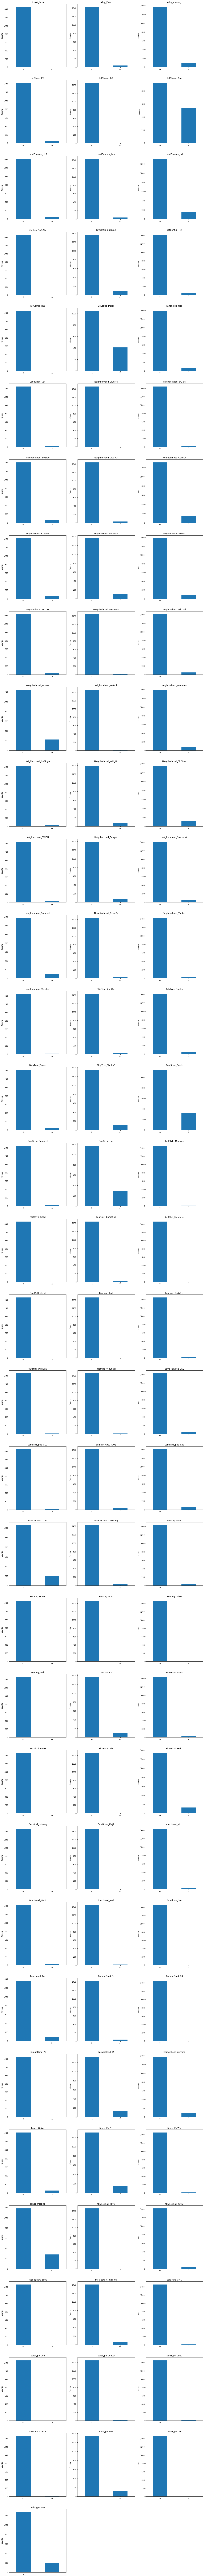

In [96]:
plot_bar(df2, list(df_cat_nom_tr.columns))

## Data Preparaion For ML model

#### Adding important attributes

In [97]:
df2["OverallFlrSf"] = df2["1stFlrSF"] + df2["2ndFlrSF"]

In [98]:
cont_added_attrs = ["OverallFlrSf"]
lib.update_attrs({"cont_added_attrs": cont_added_attrs})

attributes library updated with key:['cont_added_attrs']


#### Inspecting final data with different categories

In [99]:
df2[cont_attrs].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch
0,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,1710.0,548.0,0.0,61.0,0.0,0.0
1,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0
2,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,1786.0,608.0,0.0,42.0,0.0,0.0
3,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,1717.0,642.0,0.0,35.0,272.0,0.0
4,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,2198.0,836.0,192.0,84.0,0.0,0.0


In [100]:
df2[dis_attrs].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60.0,7.0,5.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2.0,0.0,0.0,0.0,2.0
1,20.0,6.0,8.0,0.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,2.0,0.0,0.0,0.0,5.0
2,60.0,7.0,5.0,0.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,0.0,0.0,0.0,9.0
3,70.0,7.0,5.0,0.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,3.0,0.0,0.0,0.0,2.0
4,60.0,8.0,5.0,0.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,3.0,0.0,0.0,0.0,12.0


In [101]:
df2[cont_added_attrs].head()

,OverallFlrSf
0,1710.0
1,1262.0
2,1786.0
3,1717.0
4,2198.0


In [102]:
df2[date_time_attrs].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003.0,2003.0,2003.0,2008.0
1,1976.0,1976.0,1976.0,2007.0
2,2001.0,2002.0,2001.0,2008.0
3,1915.0,1970.0,1998.0,2006.0
4,2000.0,2000.0,2000.0,2008.0


In [103]:
df2[cat_nom_tr_attrs].head()

,Street_Pave,Alley_Pave,Alley_missing,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_missing,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Electrical_missing,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_missing,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_missing,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
2,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
3,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [104]:
df2[cat_ord_attrs].head()

,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual
0,4,2,2,6,2,5,3,2,3,3,4,4,1,6,4,3,5,4,3,4,3,4,4
1,4,1,2,5,0,3,3,2,3,3,2,2,4,5,3,3,5,4,3,3,3,4,3
2,4,2,2,6,2,5,3,2,3,3,4,4,2,6,4,3,5,4,3,3,3,4,4
3,4,2,2,6,0,2,2,1,3,2,2,2,1,5,3,3,4,3,4,4,3,4,4
4,4,2,2,6,2,5,3,2,3,3,4,4,3,6,4,3,5,4,3,3,3,4,4


In [105]:
df2[labels].head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


#### Observations
    - continuos/added/labels features needed to be transform to log scale
    - discrete/datetime needed to be transform to minmax/standard scale
    - cat-ordinal/cat-nominal-tr are already at scale

### Feature Scaling

#### Converting continuos features to log-scale

In [157]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, OneHotEncoder

class LogNormalTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, attr_list=None): # no *args **kwargs
        self.attr_list = attr_list

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # for attr in self.attr_list:
        #     X[attr] = np.log1p(X[attr])
        return np.log1p(X)

class AddingContFeatures(BaseEstimator, TransformerMixin):

    def __init__(self): # no *args **kwargs
        pass
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.c_[X, X[:, 7] + X[:, 8]]

class CatNomImputer(BaseEstimator, TransformerMixin):

    def __init__(self,  impute_with, attr_list=None,): # no *args **kwargs
        self.attr_list = attr_list
        self.impute_with = impute_with

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # for attr in self.attr_list:
        #     X[attr] = X[attr].fillna(self.impute_with)
        return X.fillna(self.impute_with)

class CatNomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, attr_list=None, drop_first=True): # no *args **kwargs
        self.attr_list = attr_list
        self.drop_first = drop_first

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        # X1 = X[[attr for attr in X.columns if attr not in self.attr_list]]
        # X2 = pd.get_dummies(X[self.attr_list], drop_first=self.drop_first)
        return pd.get_dummies(X, drop_first=self.drop_first)


class CatOrdImputer(BaseEstimator, TransformerMixin):

    def __init__(self, attr_list=None):
        self.attr_list = attr_list
    
    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        for attr in X.columns:
            X[attr] = X[attr].fillna(X[attr].mode()[0])
        return X

class CatOrdEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X['MSZoning'] = X['MSZoning'].replace({'C (all)':1,'RM':2,'RH':3,'RL':4,'FV':5})
        X['Condition1'] = X['Condition1'].replace({'Artery':1,
                                                'RRAe':1,
                                                'RRNn':1,
                                                'Feedr':1,
                                                'RRNe':1,
                                                'RRAn':1,
                                                'Norm':2,
                                                'PosA':3,
                                                'PosN':3})
        X['Condition2'] = X['Condition2'].replace({'RRNn':1,
                                                'Artery':2, 
                                                'Feedr':2,
                                                'RRAn':2,
                                                'RRAe':2,    
                                                'Norm':2,
                                                'PosA':3,
                                                'PosN':3})
        X['HouseStyle'] = X['HouseStyle'].apply(self.HouseStyleToInt)
        X['MasVnrType'] = X['MasVnrType'].apply(self.MasVnrTypeToInt)
        X['Foundation'] = X['Foundation'].replace({'Slab':1,'BrkTil':2,'Stone':2,'CBlock':3,'Wood':4,'PConc':5})
        X['GarageType'] = X['GarageType'].replace({'CarPort':1,'Basment':2,'Detchd':2,'Attchd':3,'2Types':3,'BuiltIn':4})
        X['GarageFinish'] = X['GarageFinish'].replace({'Unf':1,'RFn':2,'Fin':3})
        X['PavedDrive'] = X['PavedDrive'].replace({'N':1,'P':2,'Y':3})
        X['SaleCondition'] = X['SaleCondition'].replace({'AdjLand':1,'Abnorml':2,'Family':2,'Alloca':2,'Normal':3,'Partial':4})
        ext_lable = {'AsbShng':1,'AsphShn':1,
                    'MetalSd':2,'Wd Sdng':2,'WdShing':2, 'Wd Shng':2,'Stucco':2,'CBlock':2,
                    'HdBoard':3,'BrkFace':3,'Plywood':3,'Other':3,
                    'VinylSd':4,'CemntBd':4,'BrkComm':4,'CmentBd':4,'Brk Cmn':4,
                    'Stone':5,'ImStucc':5 }
        X['Exterior1st'] = X['Exterior1st'].replace(ext_lable)
        X['Exterior2nd'] = X['Exterior2nd'].replace(ext_lable)
        X['BsmtExposure'] = X['BsmtExposure'].apply(self.BsmtExposureToInt)
        X['BsmtFinType1'] = X['BsmtFinType1'].apply(self.BsmtFinType1ToInt)
        quality_label = {'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}

        X['ExterQual'] = X['ExterQual'].replace(quality_label)
        X['ExterCond'] = X['ExterCond'].replace(quality_label)
        X['KitchenQual'] = X['KitchenQual'].replace(quality_label)
        X['HeatingQC'] = X['HeatingQC'].replace(quality_label)
        X['BsmtQual'] = X['BsmtQual'].replace(quality_label)
        X['BsmtCond'] = X['BsmtCond'].replace(quality_label)
        X['FireplaceQu'] = X['FireplaceQu'].replace(quality_label)
        X['GarageQual'] = X['GarageQual'].replace(quality_label)
        X['PoolQC'] = X['PoolQC'].replace(quality_label)

        return X

    def HouseStyleToInt(self, x):
        if(x=='1.5Unf'):
            r = 0
        elif(x=='SFoyer'):
            r = 1
        elif(x=='1.5Fin'):
            r = 2
        elif(x=='2.5Unf'):
            r = 3
        elif(x=='SLvl'):
            r = 4
        elif(x=='1Story'):
            r = 5
        elif(x=='2Story'):
            r = 6  
        elif(x==' 2.5Fin'):
            r = 7          
        else:
            r = 8
        return r

    def MasVnrTypeToInt(self, x):
        if(x=='Stone'):
            r = 3
        elif(x=='BrkFace'):
            r = 2
        elif(x=='BrkCmn'):
            r = 1        
        else:
            r = 0
        return r

    def BsmtExposureToInt(self, x):
        if(x=='Gd'):
            r = 4
        elif(x=='Av'):
            r = 3
        elif(x=='Mn'):
            r = 2
        elif(x=='No'):
            r = 1
        else:
            r = 0
        return r

    def BsmtFinType1ToInt(self, x):
        if(x=='GLQ'):
            r = 6
        elif(x=='ALQ'):
            r = 5
        elif(x=='BLQ'):
            r = 4
        elif(x=='Rec'):
            r = 3   
        elif(x=='LwQ'):
            r = 2
        elif(x=='Unf'):
            r = 1        
        else:
            r = 0
        return r



dis_pipeline = Pipeline([("dis_imputer", SimpleImputer(strategy="median")),
                ("std_scale", StandardScaler())
                        ])

cont_pipeline = Pipeline([("cont_imputer", SimpleImputer(strategy="median")),
                ("add_feature", AddingContFeatures()),
                ("log_normal", LogNormalTransformer())
                         ])

date_time_pipeline = Pipeline([("date_time_imputer", SimpleImputer(strategy="median")), 
                      ("std_scaler", StandardScaler())])

cat_nom_pipeline = Pipeline([("nom_imputer", CatNomImputer("missing")),
                    ("nom_encoding", OneHotEncoder())])

cat_ord_pipeline = Pipeline([("ord_imputer", CatOrdImputer()), 
                    ("ord_encoding", CatOrdEncoder())])

label_pipeline = [("log_normal", LogNormalTransformer())]

In [266]:
full_pipeline = ColumnTransformer([("dis_pipeline", dis_pipeline, dis_attrs),
                                  ("cont_pipeline", cont_pipeline, cont_attrs),
                                  ("date_time_pipeline", date_time_pipeline, date_time_attrs),
                                  ("cat_nom_pipeline", cat_nom_pipeline, cat_nom_attrs),
                                  ("cat_ord_pipeline", cat_ord_pipeline, cat_ord_attrs)
                                  ], remainder="drop")

In [326]:
class DataPeparation:
    
    def __init__(self, data_dir, file_name, columns=[]):
        self.columns = columns
        self.df = load_csv(data_dir, file_name)
        self.labels = None
        self.prepared = None
        
    def get_columns(self):
        if not self.columns:
            self.tranform_data()
        return self.columns
    
    def tranform_data(self):
        # for features
        if self.prepared and self.labels:
            return pd.DataFrame(self.prepared, columns=columns), self.labels
        self.prepared = full_pipeline.fit_transform(df_)
        if not self.columns: self.assign_columns()
        log_trans = LogNormalTransformer()
        self.labels = log_trans.fit_transform(self.df[labels])
        return pd.DataFrame(self.prepared, columns=columns), self.labels

    def assign_columns(self):
        """
        To exactly define code for columns assignment we need to 
        get the clarity on pipeline that we created
        """
        self.columns = []
        for pipeline in full_pipeline.transformers_[:-1]:
            if "cont_pipeline" == pipeline[0]:
                self.columns += pipeline[-1]
                self.columns += lib.attrs["cont_added_attrs"]
            elif "cat_nom_pipeline" == pipeline[0]:
                self.columns += list(pipeline[1]["nom_encoding"].get_feature_names_out(cat_nom_attrs))
            else:
                self.columns += pipeline[-1]



#### Preparing train set

In [327]:
dp = DataPeparation("housing", "advanced_housing_train_kaggle.csv")
df_train, df_labels= dp.tranform_data()

In [328]:
df_train.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,OverallFlrSf,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_missing,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual
0,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,-0.116339,-0.068692,-0.087688,-1.599111,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,7.444833,1.050994,0.878668,1.017598,0.138777,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,4.0,1.0,6.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0
1,-0.872563,-0.071836,2.179628,-0.120242,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,-0.489110,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,7.141245,0.156734,-0.429577,-0.107927,-0.614439,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,5.0,0.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,4.0,5.0,3.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0
2,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,0.990891,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,7.488294,0.984752,0.830215,0.934226,0.138777,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,4.0,2.0,6.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,4.0
3,0.309859,0.651479,-0.517200,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,-0.116339,-0.068692,-0.087688,-1.599111,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,7.448916,-1.863632,-0.720298,0.809167,-1.367655,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,0.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,5.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0
4,0.073375,1.374795,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,-0.116339,-0.068692,-0.087688,2.100892,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,7.695758,0.951632,0.733308,0.892540,0.138777,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,

In [330]:
df_labels.head()

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


#### Preparing test set

In [297]:
test = load_csv("housing", "advanced_housing_test_kaggle.csv")

In [300]:
full_pipeline.transform(test).shape

(1459, 180)

##### Removing inconsistency in categorical nominal features
    - Here inconsistency means, in the test dataset you will find the nominal columns with missing values which was not in the case of train set.
    - To overcome the issue thta columns missing values should be replaced with mode of that column
**Note:** inconsistency can only be found when we run the above code.

In [299]:
cat_nom_missing_columns = [4, 15, 19]
for c in cat_nom_missing_columns:
    test[cat_nom_attrs[c]] = test[cat_nom_attrs[c]].fillna(test[cat_nom_attrs[c]].mode()[0])
    print(test[cat_nom_attrs[c]][test[cat_nom_attrs[c]].isna() == True])

Series([], Name: Utilities, dtype: object)
Series([], Name: Functional, dtype: object)
Series([], Name: SaleType, dtype: object)


In [301]:
df_test = pd.DataFrame(full_pipeline.transform(test), columns=dp.get_columns())

In [302]:
df_test.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,OverallFlrSf,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_missing,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual
0,-0.872563,-0.795151,0.381743,-0.120242,-0.819964,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.026858,-0.116339,-0.068692,-0.087688,-0.119110,4.394449,9.360741,0.000000,6.150603,4.976734,5.602119,6.783325,6.799056,0.000000,6.799056,6.594413,4.948760,0.000000,0.0,4.795791,6.799056,-0.340077,-1.156380,-0.733219,1.64521,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,5.0,0.0,3.0,3.0,1.0,3.0,3.0,4.0,4.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,3.0
1,-0.872563,-0.071836,0.381743,-0.120242,-0.819964,-0.241061,-1.026041,1.227585,0.163779,-0.211454,-0.318683,-0.951226,-1.026858,-0.116339,-0.068692,25.116309,-0.119110,4.406719,9.565775,4.691348,6.828712,0.000000,6.008813,7.192934,7.192934,0.000000,7.192934,5.746203,5.976351,3.610918,0.0,0.000000,7.192934,-0.439440,-1.301740,-0.858277,1.64521,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,5.0,2.0,3.0,3.0,1.0,3.0,3.0,2.0,2.0,1.0,5.0,3.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,4.0
2,0.073375,-0.795151,-0.517200,-0.120242,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,-1.229111,4.317488,9.534668,0.000000,6.674561,0.000000,4.927254,6.834109,6.834109,6.553933,7.396335,6.180017,5.361292,3.555348,0.0,0.000000,7.396335,0.852269,0.636400,0.767481,1.64521,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,0.0,5.0,3.0,3.0,3.0,3.0,4.0,4.0,1.0,6.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,5.0,3.0
3,0.073375,-0.071836,0.381743,-0.120242,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.311725,-0.116339,-0.068692,-0.087688,-0.119110,4.369448,9.208238,3.044522,6.401917,0.000000,5.783825,6.831954,6.831954,6.520621,7.380879,6.154858,5.888878,3.610918,0.0,0.000000,7.380879,0.885390,0.636400,0.809167,1.64521,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,3.0,3.0,3.0,3.0,4.0,4.0,1.0,6.0,3.0,3.0,5.0,3.0,3.0,4.0,3.0,5.0,4.0
4,1.492282,1.374795,-0.517200,-0.120242,-0.819964,-0.241061,0.789741,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,0.311725,-0.116339,-0.068692,-0.087688,-1.969111,3.784190,8.518392,0.000000,5.575949,0.000000,6.925595,7.155396,7.155396,0.000000,7.155396,6.228511,0.000000,4.418841,0.0,4.976734,7.155396,0.686666,0.345679,0.559051,1.64521,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.

In [350]:
df_final = pd.concat([df_train, df_labels], axis=1)

#### Finding the correlation of features with target varable

In [366]:
corr1 = Correlatiion(df_final, list(df_final.columns), "SalePrice", ratio=0.5)
corr1.find_corr()

In [367]:
imp_attrs = corr1.imp
lib.update_attrs({"imp_attrs": imp_attrs})

attributes library updated with key:['imp_attrs']


## Model Selections and Training

### Linear Regression with all the features

In [331]:
X = df_train
y = df_labels
X.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,OverallFlrSf,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_missing,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual
0,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,-0.116339,-0.068692,-0.087688,-1.599111,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,7.444833,1.050994,0.878668,1.017598,0.138777,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,4.0,1.0,6.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0
1,-0.872563,-0.071836,2.179628,-0.120242,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,-0.489110,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,7.141245,0.156734,-0.429577,-0.107927,-0.614439,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,5.0,0.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,4.0,5.0,3.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0
2,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,0.990891,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,7.488294,0.984752,0.830215,0.934226,0.138777,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,4.0,2.0,6.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,4.0
3,0.309859,0.651479,-0.517200,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,-0.116339,-0.068692,-0.087688,-1.599111,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,7.448916,-1.863632,-0.720298,0.809167,-1.367655,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,0.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,5.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0
4,0.073375,1.374795,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,-0.116339,-0.068692,-0.087688,2.100892,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,7.695758,0.951632,0.733308,0.892540,0.138777,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,

In [332]:
from sklearn.linear_model import LinearRegression

lin_reg =  LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [333]:
sample_data = X.iloc[:5]

In [334]:
lin_reg.predict(sample_data)

array([[12.25296021],
       [12.17047119],
       [12.2779541 ],
       [12.09817505],
       [12.60238647]])

In [335]:
y.head()

,SalePrice
0,12.247699
1,12.109016
2,12.317171
3,11.849405
4,12.429220


##### Performance measure

In [336]:
from sklearn.metrics import mean_squared_error

y_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse, lin_mse

(0.10358004891498694, 0.010728826533231088)

In [337]:
y.min()[0], y.max()[0]

(10.460270761075149, 13.534474352733596)

In [338]:
lin_reg.score(X, y)

0.9327137202954884

###### Note 
    - model score here returns the value of R^2(r-square)
    - R^2 definition: Compares models output with the mean of the labels. Can be range from negative infinite to 1
    - R^2 score more near to 1 means predictions is more near to target
    - R^2 score more near to 0 means predictions is more near to mean of target
    - R^2 score is far negative means predictions is more deviated from the  target

##### Performance measure with Cross-Validation

In [339]:
from sklearn.model_selection import cross_val_score

# for decision tree model
scores = cross_val_score(lin_reg, X, y, 
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

##### Note
    - here we have specified the scoring argument as negative mean squared error. So score will be MSE

In [340]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [341]:
display_scores(lin_rmse_scores)

Scores: [3.26772891e+07 2.85048570e+08 6.96433283e+08 1.59186690e-01
 5.68286377e+07 1.13571828e-01 6.34282930e+09 1.11301679e-01
 1.23070565e+11 7.24310455e+09]
Mean: 13772748657.322693
Standard deviation: 36527718947.28464


#### Observatios
    - linear regression using cross-validation shows higher error and also not acceptable as min and max price of house is far less than the mean-error

### DecisionTress Regressor with all the features

In [342]:
X = df_train
y = df_labels
X.head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,OverallFlrSf,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,Alley_missing,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,Functional_Sev,Functional_Typ,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_missing,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_missing,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,MiscFeature_missing,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MSZoning,Condition1,Condition2,HouseStyle,MasVnrType,Foundation,GarageType,GarageFinish,PavedDrive,SaleCondition,Exterior1st,Exterior2nd,BsmtExposure,BsmtFinType1,ExterQual,ExterCond,HeatingQC,BsmtQual,BsmtCond,FireplaceQu,GarageQual,PoolQC,KitchenQual
0,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,-0.116339,-0.068692,-0.087688,-1.599111,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,7.444833,6.308098,0.000000,4.127134,0.000000,0.0,7.444833,1.050994,0.878668,1.017598,0.138777,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,4.0,1.0,6.0,4.0,3.0,5.0,4.0,3.0,4.0,3.0,4.0,4.0
1,-0.872563,-0.071836,2.179628,-0.120242,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,-0.489110,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,7.141245,6.133398,5.700444,0.000000,0.000000,0.0,7.141245,0.156734,-0.429577,-0.107927,-0.614439,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,1.0,2.0,5.0,0.0,3.0,3.0,2.0,3.0,3.0,2.0,2.0,4.0,5.0,3.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,3.0
2,0.073375,0.651479,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.116339,-0.068692,-0.087688,0.990891,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,7.488294,6.411818,0.000000,3.761200,0.000000,0.0,7.488294,0.984752,0.830215,0.934226,0.138777,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,2.0,5.0,3.0,2.0,3.0,3.0,4.0,4.0,2.0,6.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0,4.0,4.0
3,0.309859,0.651479,-0.517200,-0.120242,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,-0.116339,-0.068692,-0.087688,-1.599111,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,7.448916,6.466145,0.000000,3.583519,5.609472,0.0,7.448916,-1.863632,-0.720298,0.809167,-1.367655,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0,2.0,6.0,0.0,2.0,2.0,1.0,3.0,2.0,2.0,2.0,1.0,5.0,3.0,3.0,4.0,3.0,4.0,4.0,3.0,4.0,4.0
4,0.073375,1.374795,-0.517200,-0.120242,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,-0.116339,-0.068692,-0.087688,2.100892,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,7.695758,6.729824,5.262690,4.442651,0.000000,0.0,7.695758,0.951632,0.733308,0.892540,0.138777,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,

In [343]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X, y)

DecisionTreeRegressor()

In [344]:
y_predictions = tree_reg.predict(X)
tree_mse = mean_squared_error(y, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse, tree_mse

(0.0, 0.0)

In [345]:
tree_reg.score(X, y)

1.0

##### Performance measure with Cross-Validation

In [346]:
from sklearn.model_selection import cross_val_score

# for decision tree model
scores = cross_val_score(tree_reg, X, y, 
                        scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [347]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [348]:
display_scores(tree_rmse_scores)

Scores: [0.19392939 0.19849937 0.1801544  0.23751989 0.20284293 0.15662716
 0.19500185 0.19535186 0.17206485 0.201132  ]
Mean: 0.19331237089225906
Standard deviation: 0.020275542775370005


#### Observations
    - decision tree has high overfitting issue when measured performance on train set
    - decision tree is more robust on non-linear relationships
    - decision tree performance measure using cross-validations clearly shows the higher mean-error but less compare to linear regression

### Linear Regression with selected features

In [399]:
corr1 = Correlatiion(df_final, list(df_final.columns), "SalePrice", ratio=0.3)
corr1.find_corr()

In [400]:
X = df_train[corr1.imp].copy()
y = df_labels
X.shape

(1460, 41)

In [401]:
lin_reg =  LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [402]:
y_predictions = lin_reg.predict(X)
lin_mse = mean_squared_error(y, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse, lin_mse

(0.13434608772257423, 0.018048871286361613)

In [403]:
lin_reg.score(X, y)

0.8868057566255463

In [404]:
from sklearn.model_selection import cross_val_score

# for linear regression model
scores = cross_val_score(lin_reg, X, y, 
                        scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [405]:
display_scores(lin_rmse_scores)

Scores: [0.12704564 0.11696146 0.13013608 0.16313445 0.15354163 0.11456927
 0.1251015  0.12996629 0.17880431 0.1413468 ]
Mean: 0.13806074265412518
Standard deviation: 0.019884185971789665


#### Observations
    - Linear regression with selected features seems to be improved in terms of performance measure using cross validation. Without feature selection mean was '13772748657.322693', wich is quite high
    - Second thing, also improved it terms of overfitting as previously the model score was 0.9327137202954884, which is high compare to 0.8868057566255463

### Random forest regressor

In [518]:
corr1 = Correlatiion(df_final, list(df_final.columns), "SalePrice", ratio=0)
selected_attrs = corr1.get_imp_cor_attrs()
X = df_train[selected_attrs].copy()
y = df_labels

In [441]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(X, y.values.ravel())

RandomForestRegressor()

In [442]:
y_predictions = forest_reg.predict(X)
forest_mse = mean_squared_error(y, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse, lin_mse

(0.05240037620514046, 0.018048871286361613)

In [443]:
forest_reg.score(X, y)

0.9827796052394273

In [444]:
# for forest regression model
scores = cross_val_score(forest_reg, X, y.values.ravel(), 
                        scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

In [445]:
display_scores(forest_rmse_scores)

Scores: [0.14309611 0.12033996 0.13218341 0.17053436 0.16614595 0.11339726
 0.12990951 0.1188845  0.14476684 0.15284476]
Mean: 0.13921026594591596
Standard deviation: 0.018735050973905175


#### Observations
    - random forest regressor has model score quite high or we can say overfitting
    - has loweset mean compare to DecisionTree which is 0.19331237089225906 and almost equal compare to Linear with selected feature which is 0.13806074265412518 using cross-validation
    - random forest regressor performes well with all the features compare to selected features. THe reason might be it performs well for non-linear features to labels

### Support Vector Machine

In [470]:
corr1 = Correlatiion(df_final, list(df_final.columns), "SalePrice", ratio=0)
selected_attrs = corr1.get_imp_cor_attrs()
X = df_train[selected_attrs].copy()
y = y

In [471]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(X, y.values.ravel())

SVR()

In [472]:
y_predictions = svr.predict(X)
svr_mse = mean_squared_error(y, y_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse, lin_mse

(0.11337799113715434, 0.018048871286361613)

In [473]:
svr.score(X, y)

0.9193820392120414

In [474]:
# for svr regression model
scores = cross_val_score(svr, X, y.values.ravel(), 
                        scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-scores)

In [475]:
display_scores(svr_rmse_scores)

Scores: [0.12118652 0.10244748 0.1176592  0.16816885 0.14627797 0.10851829
 0.1222557  0.10098063 0.15579199 0.123925  ]
Mean: 0.12672116259715066
Standard deviation: 0.021608179640128403


#### Observations
    - SVM has lowest mean compare to other models using cross validation.
    - Performs well with all features instead of selected features

### SVM with RandomizedSearchCV

In [495]:
corr1 = Correlatiion(df_final, list(df_final.columns), "SalePrice", ratio=0)
selected_attrs = corr1.get_imp_cor_attrs()
X = df_train[selected_attrs].copy()
y = y

In [479]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

param_grid = [{"kernel": ["linear", "poly", "rbf"],
               "C": stats.uniform(2, 10),
               "gamma": stats.uniform(0.1, 1)}]
svr = SVR()
ran_search = RandomizedSearchCV(svr, param_grid, cv=5, 
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

ran_search.fit(X, y.values.ravel())

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020ECC765F10>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000020ED8957FD0>,
                                         'kernel': ['linear', 'poly', 'rbf']}],
                   return_train_score=True, scoring='neg_mean_squared_error')

In [480]:
ran_search.best_params_

{'C': 11.23789057556165, 'gamma': 1.0920274306557647, 'kernel': 'linear'}

In [481]:
ran_search.best_estimator_

SVR(C=11.23789057556165, gamma=1.0920274306557647, kernel='linear')

In [482]:
cvres = ran_search.cv_results_

In [483]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.14576996000937412 {'C': 7.7574117206725814, 'gamma': 0.944068946299387, 'kernel': 'poly'}
0.3986808917319793 {'C': 2.838451802160317, 'gamma': 0.5415138007206073, 'kernel': 'rbf'}
0.3736512629071693 {'C': 4.744852356305668, 'gamma': 0.17091522884120683, 'kernel': 'rbf'}
0.14577232354841474 {'C': 11.732240784605576, 'gamma': 1.0779763991860916, 'kernel': 'poly'}
0.14578518482929068 {'C': 7.122387792036493, 'gamma': 0.15256520429683376, 'kernel': 'poly'}
0.14577052524814907 {'C': 4.769498354161001, 'gamma': 0.5975257794639977, 'kernel': 'poly'}
0.13322299951264588 {'C': 4.903439376145509, 'gamma': 0.9704556194881172, 'kernel': 'linear'}
0.13318940881826147 {'C': 7.008838706249835, 'gamma': 0.5679626667422352, 'kernel': 'linear'}
0.1329728180591274 {'C': 11.23789057556165, 'gamma': 1.0920274306557647, 'kernel': 'linear'}
0.14577568044963135 {'C': 11.440609940254241, 'gamma': 1.0982946509012523, 'kernel': 'poly'}


In [496]:
final_model = ran_search.best_estimator_
y_predictions = final_model.predict(X)
svr_mse = mean_squared_error(y, y_predictions)
svr_rmse = np.sqrt(svr_mse)
svr_rmse, lin_mse

(0.10721294433227671, 0.018048871286361613)

In [497]:
final_model.score(X, y)

0.9279110435158598

In [498]:
scores = cross_val_score(final_model, X, y.values.ravel(), 
                        scoring="neg_mean_squared_error", cv=10)
svr_rmse_scores = np.sqrt(-scores)

In [499]:
display_scores(scores)

Scores: [-0.01511055 -0.01076739 -0.01524944 -0.02416354 -0.01780002 -0.01044034
 -0.01396312 -0.01083702 -0.02952179 -0.01587543]
Mean: -0.016372863709600078
Standard deviation: 0.005846341526292467


In [504]:
y_predictions = final_model.predict(df_test)

D:\TheCompleteML\env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [535]:
df_y = pd.DataFrame(y_predictions, columns=["SalePrice"])
df_y = np.exp(df_y)
df_y["Id"] = np.arange(1461, len(df_test)+1461, 1)
df_y = df_y[["Id", "SalePrice"]]
df_y.head()

,Id,SalePrice
0,1461,1092.319327
1,1462,14042.298371
2,1463,7957.005081
3,1464,9336.053850
4,1465,8692.474025


In [539]:
csv_path = os.path.join(BASE_DIR, "datasets", "housing", "submission.csv")
df_y.to_csv(csv_path, index=False)